# **CI7520 Coursework 2 : GROUP 13**



# Medical Image Analysis and Classification

#Loading Libararies

In [ ]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.models import Model
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import cv2
import os
import pathlib
import seaborn as sns
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing import image
from sklearn.metrics import roc_curve, auc
from keras import applications
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50V2

**Storing the logs of the models**

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

#Load dataset from medmnist (https://medmnist.com/)

##Breastmnist

In [ ]:
from pickle import FALSE
get_url="https://zenodo.org/record/6496656/files/breastmnist.npz?download=1"
data_dir=tf.keras.utils.get_file(origin=get_url,
                                  fname='Breastmnist',
                                  untar=False)
brst_data = np.load(data_dir)
files=brst_data.files
print(files)

559580/559580 [==============================] - 1s 2us/step
['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


In [ ]:
# Get the data and labels for breastmnist
brst_X_train = brst_data['train_images']
brst_y_train = brst_data['train_labels']
brst_X_test = brst_data['test_images']
brst_y_test = brst_data['test_labels']
brst_X_val = brst_data['val_images']
brst_y_val = brst_data['val_labels']
print("Breastmnist train data shape:",brst_X_train.shape)
print("Breastmnist test data shape:",brst_X_test.shape)
print("Breastmnist val data shape:",brst_X_val.shape)

print("Breastmnist train labels shape:",brst_y_train.shape)
print("Breastmnist test labels shape:",brst_y_test.shape)
print("Breastmnist val labels shape:",brst_y_val.shape)

Breastmnist train data shape: (546, 28, 28)
Breastmnist test data shape: (156, 28, 28)
Breastmnist val data shape: (78, 28, 28)
Breastmnist train labels shape: (546, 1)
Breastmnist test labels shape: (156, 1)
Breastmnist val labels shape: (78, 1)


##Bloodmnist

In [ ]:
get_url="https://zenodo.org/record/6496656/files/bloodmnist.npz?download=1"
data_dir=tf.keras.utils.get_file(origin=get_url,
                                  fname='Bloodmnist',
                                  untar=False)
bld_data = np.load(data_dir)
files=bld_data.files
print(files)

35461855/35461855 [==============================] - 40s 1us/step
['train_images', 'train_labels', 'val_images', 'val_labels', 'test_images', 'test_labels']


In [ ]:
# Get the data and labels for breastmnist
bld_X_train = bld_data['train_images']
bld_y_train = bld_data['train_labels']
bld_X_test = bld_data['test_images']
bld_y_test = bld_data['test_labels']
bld_X_val = bld_data['val_images']
bld_y_val = bld_data['val_labels']
print("Bloodmnist train data shape:",bld_X_train.shape)
print("Bloodmnist test data shape:",bld_X_test.shape)
print("Bloodmnist val data shape:",bld_X_val.shape)
print("Bloodmnist train labels shape:",bld_y_train.shape)
print("Bloodmnist test labels shape:",bld_y_test.shape)
print("Bloodmnist val labels shape:",bld_y_val.shape)

Bloodmnist train data shape: (11959, 28, 28, 3)
Bloodmnist test data shape: (3421, 28, 28, 3)
Bloodmnist val data shape: (1712, 28, 28, 3)
Bloodmnist train labels shape: (11959, 1)
Bloodmnist test labels shape: (3421, 1)
Bloodmnist val labels shape: (1712, 1)


Breastmnist consist of gray scaled images whereas Bloodmnist contains RGB images

#Viewing  Images

##Breastmnist

In [ ]:
# Get the unique classes
brst_classes = np.unique(brst_y_train)
print("Breastmnist Unique classes:", brst_classes)

Breastmnist Unique classes: [0 1]


There are two unique classes in Breasmnist which are 0 - Malignant and 1 - Normal/benign.

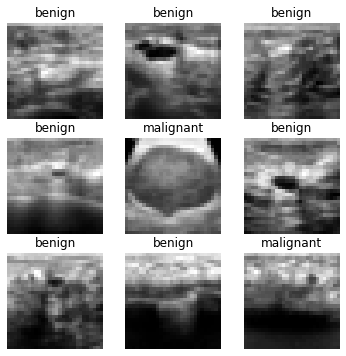

In [ ]:
# Define a function to plot images and their corresponding labels
def plot_images(images, labels, class_names=None, n_cols=3):
    n_rows = (len(images) - 1) // n_cols + 1
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(2*n_cols, 2*n_rows))
    for i, (image, label) in enumerate(zip(images, labels)):
        row, col = i // n_cols, i % n_cols
        if class_names is not None:
            title = class_names[int(label)]
        else:
            title = f"Label {label}"
        axes[row, col].imshow(image, cmap='gray')
        axes[row, col].set_title(title)
        axes[row, col].axis('off')
    plt.show()
# Define class names for Breastmnist dataset
brst_class_names = {'0': 'malignant', '1': 'benign'}
brst_class_names = list(brst_class_names.values())

# Plot 9 images of Breastmnist dataset with class names
brst_subset_images, brst_subset_labels = brst_X_train[:9], brst_y_train[:9]
plot_images(brst_subset_images, brst_subset_labels, class_names=brst_class_names)

##Bloodmnist

In [ ]:
# Get the unique classes
bld_classes = np.unique(bld_y_train)
print("Bloodmnist Unique classes:", bld_classes)

Bloodmnist Unique classes: [0 1 2 3 4 5 6 7]


There are eight unique classes in Bloodmnist which are:
0-'basophil', 1-'eosinophil', 2-'erythroblast', 3-'granulocytes', 4-'lymphocyte', 5-'monocyte', 6-'neutrophil', 7-'platelet'

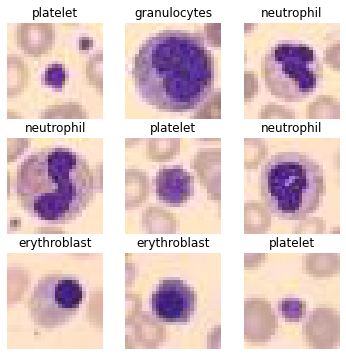

In [ ]:
# Define a function to plot images and their corresponding labels
def plot_images(images, labels, class_names=None, n_cols=3):
    n_rows = (len(images) - 1) // n_cols + 1
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(2*n_cols, 2*n_rows))
    for i, (image, label) in enumerate(zip(images, labels)):
        row, col = i // n_cols, i % n_cols
        if class_names is not None:
            title = class_names[int(label)]
        else:
            title = f"Label {label}"
        axes[row, col].imshow(image, cmap='gray')
        axes[row, col].set_title(title)
        axes[row, col].axis('off')
    plt.show()
# Define class names for Breastmnist dataset
bld_class_names = [
    'basophil', 'eosinophil', 'erythroblast', 'granulocytes',
    'lymphocyte', 'monocyte', 'neutrophil', 'platelet'
]


# Plot 9 images of Breastmnist dataset with class names
bld_subset_images, bld_subset_labels = bld_X_train[:9], bld_y_train[:9]
plot_images(bld_subset_images, bld_subset_labels, class_names=bld_class_names)

#Checking for null images

##Bloodmnist

In [ ]:
bld_data['train_images'][2]

array([[[185, 145, 154],
        [185, 149, 153],
        [202, 167, 165],
        ...,
        [249, 227, 213],
        [249, 230, 216],
        [248, 229, 214]],

       [[185, 146, 151],
        [194, 158, 158],
        [218, 185, 178],
        ...,
        [251, 230, 213],
        [248, 226, 212],
        [246, 225, 208]],

       [[205, 167, 164],
        [218, 184, 175],
        [239, 207, 192],
        ...,
        [245, 222, 204],
        [241, 218, 202],
        [240, 217, 199]],

       ...,

       [[255, 229, 205],
        [253, 225, 203],
        [255, 227, 206],
        ...,
        [222, 184, 183],
        [213, 175, 174],
        [213, 175, 174]],

       [[255, 228, 204],
        [255, 227, 203],
        [255, 230, 209],
        ...,
        [224, 184, 185],
        [215, 175, 176],
        [215, 175, 176]],

       [[255, 227, 203],
        [255, 227, 203],
        [255, 229, 208],
        ...,
        [220, 180, 180],
        [213, 173, 173],
        [214, 174, 175]]

In [ ]:
count=0
for folder in bld_data:
  for image in bld_data['train_images']:
    count = np.count_nonzero(np.isnan(image))

print("The Total number of null values in the datset is : ",count)

The Total number of null values in the datset is :  0


##Breastmnist

In [ ]:
brst_X_train[3]

array([[167, 163, 162, 151, 145, 133, 139, 149, 150, 149, 152, 159, 159,
        158, 152, 142, 136, 139, 138, 134, 137, 126, 129, 130, 139, 145,
        149, 158],
       [122, 129, 145, 137, 120, 105, 103, 107, 114, 116, 117, 124, 123,
        130, 125, 120, 112, 104,  98,  95, 100, 102, 117,  97, 104, 126,
        135, 145],
       [126, 128, 135, 123, 128, 113, 101, 108, 107, 112, 110, 122, 114,
        115, 119, 113, 108, 114, 124, 121, 132, 140, 136, 123, 129, 132,
        135, 133],
       [123, 122, 128, 120, 117, 105, 107, 117, 116, 112, 121, 126, 125,
        126, 128, 136, 149, 146, 122, 124, 123, 119, 121, 124, 126, 131,
        136, 134],
       [131, 131, 130, 137, 141, 124, 124, 136, 131, 130, 124, 118, 133,
        156, 161, 161, 171, 148, 121, 121, 127, 127, 137, 135, 133, 139,
        141, 137],
       [136, 134, 137, 124, 139, 145, 143, 146, 134, 135, 129, 126, 134,
        145, 149, 147, 150, 150, 118, 116, 129, 152, 155, 144, 137, 134,
        144, 139],
       [13

As we can see from the above numpy array of a single image if nan value are present it means the image has missing color and the image has to be corrected.So,we have checked below the nan value from the training and testing dataset.

In [ ]:
for image in brst_X_train:
  count = np.count_nonzero(np.isnan(image))
for image in brst_y_train:
  count1 = np.count_nonzero(np.isnan(image))
for image in brst_X_test:
  count2 = np.count_nonzero(np.isnan(image))
for image in brst_y_test:
  count3 = np.count_nonzero(np.isnan(image))

print("The Total number of null values in the training image datset is : ",count)
print("The Total number of null values in the training label datset is : ",count1)
print("The Total number of null values in the test image datset is : ",count2)
print("The Total number of null values in the test label datset is : ",count3)

The Total number of null values in the training image datset is :  0
The Total number of null values in the training label datset is :  0
The Total number of null values in the test image datset is :  0
The Total number of null values in the test label datset is :  0


#Normalize the data

##Breastmnist

In [ ]:
#Normalise the data
brst_X_train = brst_X_train.astype('float32') / 255.0
brst_X_test = brst_X_test.astype('float32') / 255.0
brst_X_val = brst_X_val.astype('float32') / 255.0

In [ ]:
#Reshape the data
brst_X_train = brst_X_train.reshape(brst_X_train.shape[0], 28, 28, 1)
brst_X_test = brst_X_test.reshape(brst_X_test.shape[0], 28, 28, 1)
brst_X_val = brst_X_val.reshape(brst_X_val.shape[0], 28, 28, 1)

In [ ]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

##Bloodmnist

In [ ]:
#Normalise the data
bld_X_train = bld_X_train.astype('float32') / 255.0
bld_X_test = bld_X_test.astype('float32') / 255.0
bld_X_val = bld_X_val.astype('float32') / 255.0

In [ ]:
#Reshape the data
bld_X_train = bld_X_train.reshape(bld_X_train.shape[0], 28, 28, 3)
bld_X_test = bld_X_test.reshape(bld_X_test.shape[0], 28, 28, 3)
bld_X_val = bld_X_val.reshape(bld_X_val.shape[0], 28, 28, 3)

#Deep Learning Model

##Breastmnist

###CNN Model

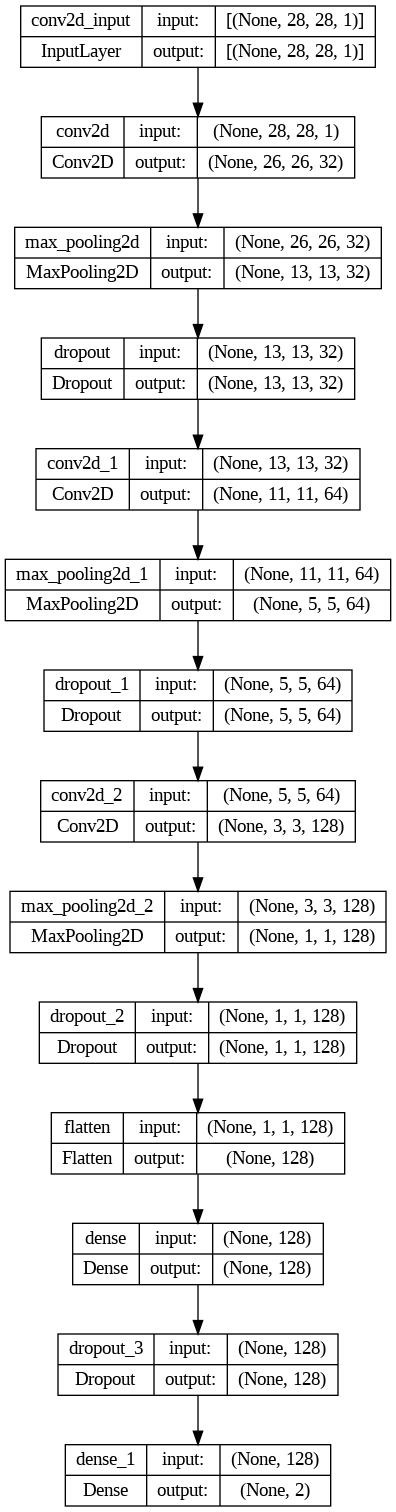

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='sigmoid')
])

keras.utils.plot_model(cnn, show_shapes=True)


In [ ]:
cnn.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist=cnn.fit(brst_X_train, brst_y_train, epochs=20,validation_data=(brst_X_val, brst_y_val),callbacks=[tensorboard_callback])
cnn.evaluate(brst_X_test,brst_y_test)

Epoch 1/20
18/18 [==============================] - 10s 41ms/step - loss: 0.6048 - accuracy: 0.7271 - val_loss: 0.6120 - val_accuracy: 0.7308
Epoch 2/20
18/18 [==============================] - 0s 6ms/step - loss: 0.5837 - accuracy: 0.7308 - val_loss: 0.5942 - val_accuracy: 0.7308
Epoch 3/20
18/18 [==============================] - 0s 7ms/step - loss: 0.5730 - accuracy: 0.7308 - val_loss: 0.5946 - val_accuracy: 0.7308
Epoch 4/20
18/18 [==============================] - 0s 7ms/step - loss: 0.5812 - accuracy: 0.7308 - val_loss: 0.5952 - val_accuracy: 0.7308
Epoch 5/20
18/18 [==============================] - 0s 8ms/step - loss: 0.5682 - accuracy: 0.7308 - val_loss: 0.5870 - val_accuracy: 0.7308
Epoch 6/20
18/18 [==============================] - 0s 7ms/step - loss: 0.5720 - accuracy: 0.7308 - val_loss: 0.5920 - val_accuracy: 0.7308
Epoch 7/20
18/18 [==============================] - 0s 7ms/step - loss: 0.5694 - accuracy: 0.7308 - val_loss: 0.5854 - val_accuracy: 0.7308
Epoch 8/20
18/18 [

[0.5690649747848511, 0.7307692170143127]

In [ ]:
# check for adam optimizer
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist1=cnn.fit(brst_X_train, brst_y_train, epochs=20,validation_data=(brst_X_val, brst_y_val),callbacks=[tensorboard_callback])
cnn.evaluate(brst_X_test,brst_y_test)

Epoch 1/20
18/18 [==============================] - 3s 25ms/step - loss: 0.5825 - accuracy: 0.7308 - val_loss: 0.5802 - val_accuracy: 0.7308
Epoch 2/20
18/18 [==============================] - 0s 11ms/step - loss: 0.5612 - accuracy: 0.7308 - val_loss: 0.5782 - val_accuracy: 0.7308
Epoch 3/20
18/18 [==============================] - 0s 10ms/step - loss: 0.5603 - accuracy: 0.7308 - val_loss: 0.5627 - val_accuracy: 0.7308
Epoch 4/20
18/18 [==============================] - 0s 10ms/step - loss: 0.5301 - accuracy: 0.7344 - val_loss: 0.5828 - val_accuracy: 0.7821
Epoch 5/20
18/18 [==============================] - 0s 10ms/step - loss: 0.5283 - accuracy: 0.7381 - val_loss: 0.5471 - val_accuracy: 0.7564
Epoch 6/20
18/18 [==============================] - 0s 11ms/step - loss: 0.5287 - accuracy: 0.7509 - val_loss: 0.5281 - val_accuracy: 0.7692
Epoch 7/20
18/18 [==============================] - 0s 10ms/step - loss: 0.5007 - accuracy: 0.7656 - val_loss: 0.4902 - val_accuracy: 0.7436
Epoch 8/20
18

[0.44999268651008606, 0.807692289352417]

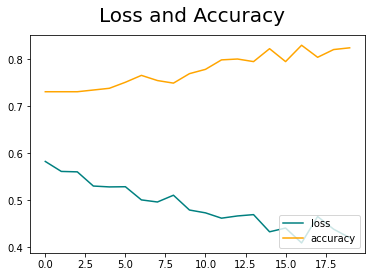

In [ ]:
fig = plt.figure()
plt.plot(hist1.history['loss'], color='teal', label='loss')
plt.plot(hist1.history['accuracy'], color='orange', label='accuracy')
fig.suptitle('Loss and Accuracy', fontsize=20)
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(brst_X_train.shape)
print(brst_y_train.shape)

(546, 28, 28, 1)
(546, 1)


####Augmented data Performance

In [ ]:
# Accuracy with augmented data
hist3=cnn.fit(datagen.flow(brst_X_train, brst_y_train, batch_size=32),
                   epochs=20,
                    validation_data=(brst_X_test, brst_y_test),callbacks=[tensorboard_callback])
cnn.evaluate(brst_X_test,brst_y_test)

Epoch 1/20
18/18 [==============================] - 1s 17ms/step - loss: 0.4824 - accuracy: 0.7692 - val_loss: 0.4120 - val_accuracy: 0.8269
Epoch 2/20
18/18 [==============================] - 0s 15ms/step - loss: 0.4818 - accuracy: 0.7967 - val_loss: 0.4168 - val_accuracy: 0.8141
Epoch 3/20
18/18 [==============================] - 0s 14ms/step - loss: 0.4476 - accuracy: 0.8077 - val_loss: 0.4016 - val_accuracy: 0.8333
Epoch 4/20
18/18 [==============================] - 0s 15ms/step - loss: 0.4676 - accuracy: 0.8004 - val_loss: 0.4800 - val_accuracy: 0.7949
Epoch 5/20
18/18 [==============================] - 1s 36ms/step - loss: 0.4820 - accuracy: 0.7985 - val_loss: 0.4526 - val_accuracy: 0.8077
Epoch 6/20
18/18 [==============================] - 0s 21ms/step - loss: 0.4592 - accuracy: 0.8004 - val_loss: 0.4519 - val_accuracy: 0.8013
Epoch 7/20
18/18 [==============================] - 0s 14ms/step - loss: 0.4475 - accuracy: 0.8114 - val_loss: 0.3982 - val_accuracy: 0.8397
Epoch 8/20
18

[0.42646437883377075, 0.8012820482254028]

#####Plot Performance

<Figure size 432x288 with 0 Axes>

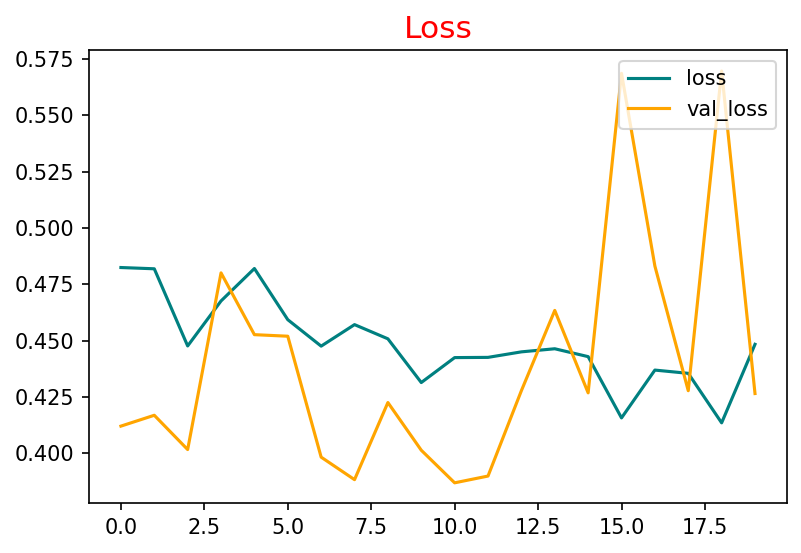

In [ ]:
fig = plt.figure()
plt.figure(dpi=150)
plt.plot(hist3.history['loss'], color='teal', label='loss')
plt.plot(hist3.history['val_loss'], color='orange', label='val_loss')
plt.title('Loss', fontsize=15,color='red')
plt.legend(loc="upper right")
plt.savefig("loss_brst.png")
plt.show()

<Figure size 432x288 with 0 Axes>

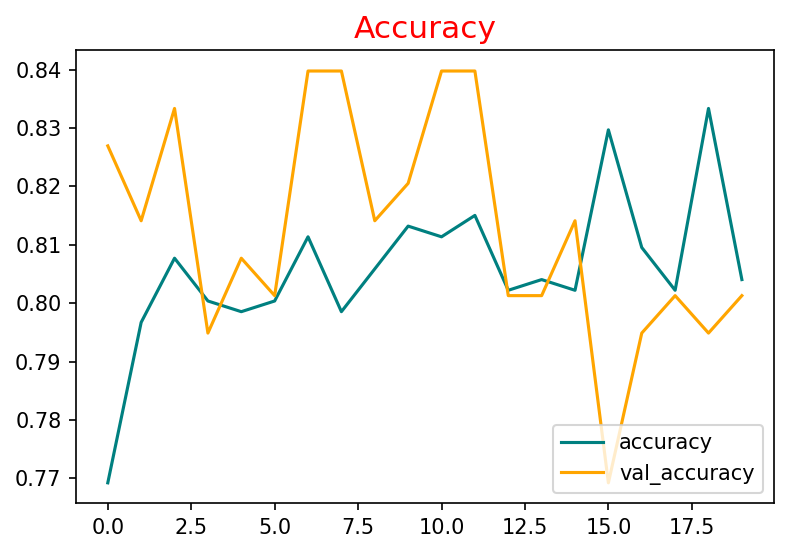

In [ ]:
fig = plt.figure()
plt.figure(dpi=150)
plt.plot(hist3.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist3.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('Accuracy', fontsize=15,color='red')
plt.legend(loc="lower right")
plt.savefig("accuracy_brst.png")
plt.show()

#####Classification Report

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(brst_X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(brst_y_test, y_pred_classes))

5/5 [==============================] - 0s 5ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.31      0.46        42
           1       0.79      0.98      0.88       114

    accuracy                           0.80       156
   macro avg       0.83      0.65      0.67       156
weighted avg       0.81      0.80      0.76       156



#### Keras Tuner Hypertuning

In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.6 MB/s eta 0:00:00


In [ ]:
def build_model(hp):
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(2, activation='sigmoid')
  ])

  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

  return model

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

<ipython-input-32-2bbfbe7dae29>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="BreastMnist")

In [ ]:
tuner_search.search(brst_X_train, brst_y_train, epochs=20,validation_data=(brst_X_val, brst_y_val))

Trial 5 Complete [00h 00m 05s]
val_accuracy: 0.8589743375778198

Best val_accuracy So Far: 0.8974359035491943
Total elapsed time: 00h 00m 42s


In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 48)        38448     
                                                                 
 flatten (Flatten)           (None, 23232)             0         
                                                                 
 dense (Dense)               (None, 48)                1115184   
                                                                 
 dense_1 (Dense)             (None, 2)                 98        
                                                                 
Total params: 1,154,050
Trainable params: 1,154,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(brst_X_train, brst_y_train, epochs=10, initial_epoch=3,validation_data=(brst_X_val, brst_y_val))
cnn.evaluate(brst_X_test,brst_y_test)

Epoch 4/10
18/18 [==============================] - 2s 14ms/step - loss: 0.2289 - accuracy: 0.9103 - val_loss: 0.4639 - val_accuracy: 0.8590
Epoch 5/10
18/18 [==============================] - 0s 11ms/step - loss: 0.1924 - accuracy: 0.9322 - val_loss: 0.4214 - val_accuracy: 0.8718
Epoch 6/10
18/18 [==============================] - 0s 13ms/step - loss: 0.1730 - accuracy: 0.9304 - val_loss: 0.4304 - val_accuracy: 0.8590
Epoch 7/10
18/18 [==============================] - 0s 13ms/step - loss: 0.1519 - accuracy: 0.9487 - val_loss: 0.4702 - val_accuracy: 0.8590
Epoch 8/10
18/18 [==============================] - 0s 11ms/step - loss: 0.1127 - accuracy: 0.9652 - val_loss: 0.4517 - val_accuracy: 0.8590
Epoch 9/10
18/18 [==============================] - 0s 8ms/step - loss: 0.0929 - accuracy: 0.9707 - val_loss: 0.6295 - val_accuracy: 0.8590
Epoch 10/10
5/5 [==============================] - 0s 5ms/step - loss: 0.4265 - accuracy: 0.8013


[0.42646437883377075, 0.8012820482254028]

####Resample Imbalanced Data

In [ ]:
# F1 score for 0 is less, we need to handle the imbalanced data
unique_labels_brst, class_counts_brst = np.unique(brst_y_train, return_counts=True)
print("Unique labels for breastmnist:", unique_labels_brst)
print("Label counts for breastmnist:", class_counts_brst)
unique_labels_bld, class_counts_bld = np.unique(bld_y_train, return_counts=True)
print("Unique labels for bloodmnist:", unique_labels_bld)
print("Label counts for bloodmnist:", class_counts_bld)

Unique labels for breastmnist: [0 1]
Label counts for breastmnist: [147 399]
Unique labels for bloodmnist: [0 1 2 3 4 5 6 7]
Label counts for bloodmnist: [ 852 2181 1085 2026  849  993 2330 1643]


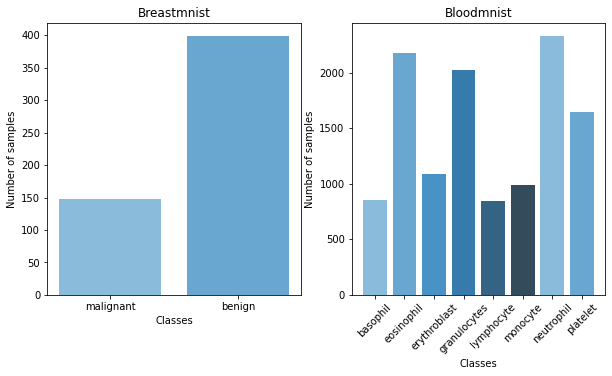

In [ ]:
# Plot the imbalanced data
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.set_palette('Blues_d')
# Plot the class distribution of the Breastmnist dataset
axs[0].bar(unique_labels_brst, class_counts_brst, color=sns.color_palette())
axs[0].set_xticks(unique_labels_brst)
axs[0].set_xticklabels(brst_class_names)
axs[0].set_xlabel('Classes')
axs[0].set_ylabel('Number of samples')
axs[0].set_title('Breastmnist')

# Plot the class distribution of the Bloodmnist dataset
axs[1].bar(unique_labels_bld, class_counts_bld, color=sns.color_palette())
axs[1].set_xticks(unique_labels_bld)
axs[1].set_xticklabels(bld_class_names, rotation=45)
axs[1].set_xlabel('Classes')
axs[1].set_ylabel('Number of samples')
axs[1].set_title('Bloodmnist')

# Show the plot
plt.show()

In [ ]:
# Get the maximum count of any class
max_count = class_counts_brst.max()

# Resample the data to balance the classes
brst_X_resampled = []
brst_y_resampled = []
for label in np.unique(brst_y_train):
    label_indices = np.where(brst_y_train == label)[0]
    resampled_indices = np.random.choice(label_indices, size=max_count, replace=True)
    brst_X_resampled.append(brst_X_train[resampled_indices])
    brst_y_resampled.append(brst_y_train[resampled_indices])

# Concatenate the resampled data
brst_X_train_resampled = np.concatenate(brst_X_resampled, axis=0)
brst_y_train_resampled = np.concatenate(brst_y_resampled, axis=0)

# Print the new class distribution
print("Resampled class distribution for Breastmnist:")
unique_labels_brst, class_counts_brst = np.unique(brst_y_train_resampled, return_counts=True)
print("Unique labels for breastmnist:", unique_labels_brst)
print("Label counts for breastmnist:", class_counts_brst)

Resampled class distribution for Breastmnist:
Unique labels for breastmnist: [0 1]
Label counts for breastmnist: [399 399]


In [ ]:
# Accuracy of resampled data
hist4=cnn.fit(brst_X_train_resampled, brst_y_train_resampled, epochs=10,validation_data=(brst_X_val, brst_y_val))
cnn.evaluate(brst_X_test,brst_y_test)

Epoch 1/10
25/25 [==============================] - 1s 21ms/step - loss: 0.4816 - accuracy: 0.7782 - val_loss: 0.3936 - val_accuracy: 0.8846
Epoch 2/10
25/25 [==============================] - 0s 10ms/step - loss: 0.4079 - accuracy: 0.8183 - val_loss: 0.3344 - val_accuracy: 0.8846
Epoch 3/10
25/25 [==============================] - 0s 14ms/step - loss: 0.4036 - accuracy: 0.8258 - val_loss: 0.3515 - val_accuracy: 0.8846
Epoch 4/10
25/25 [==============================] - 0s 12ms/step - loss: 0.3619 - accuracy: 0.8333 - val_loss: 0.3222 - val_accuracy: 0.8974
Epoch 5/10
25/25 [==============================] - 0s 14ms/step - loss: 0.3451 - accuracy: 0.8521 - val_loss: 0.3683 - val_accuracy: 0.8718
Epoch 6/10
25/25 [==============================] - 0s 10ms/step - loss: 0.3498 - accuracy: 0.8496 - val_loss: 0.4650 - val_accuracy: 0.8333
Epoch 7/10
25/25 [==============================] - 0s 14ms/step - loss: 0.3276 - accuracy: 0.8534 - val_loss: 0.3243 - val_accuracy: 0.8846
Epoch 8/10
25

[0.44584059715270996, 0.8333333134651184]

#####Plot Performance

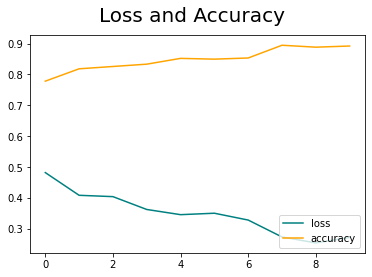

In [ ]:
fig = plt.figure()
plt.plot(hist4.history['loss'], color='teal', label='loss')
plt.plot(hist4.history['accuracy'], color='orange', label='accuracy')
fig.suptitle('Loss and Accuracy', fontsize=20)
plt.legend(loc="lower right")
plt.show()

<Figure size 432x288 with 0 Axes>

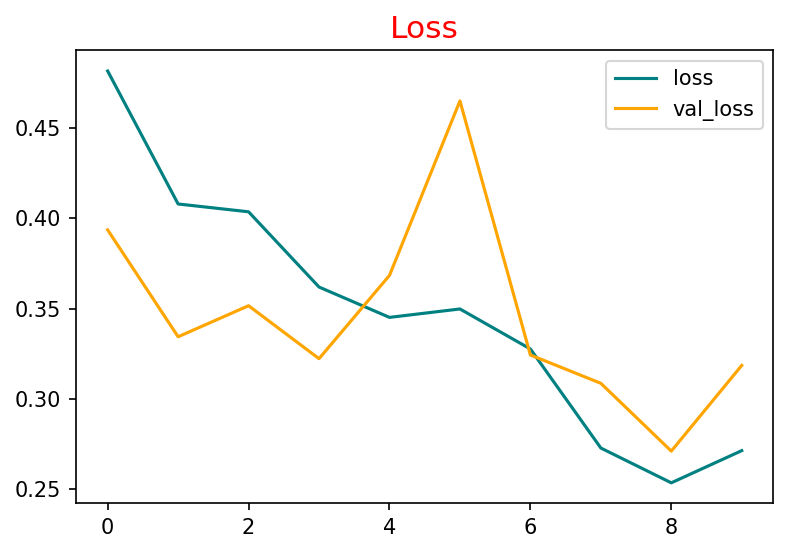

In [ ]:
fig = plt.figure()
plt.figure(dpi=150)
plt.plot(hist4.history['loss'], color='teal', label='loss')
plt.plot(hist4.history['val_loss'], color='orange', label='val_loss')
plt.title('Loss', fontsize=15,color='red')
plt.legend(loc="upper right")
plt.savefig("loss_brst.png")
plt.show()

<Figure size 432x288 with 0 Axes>

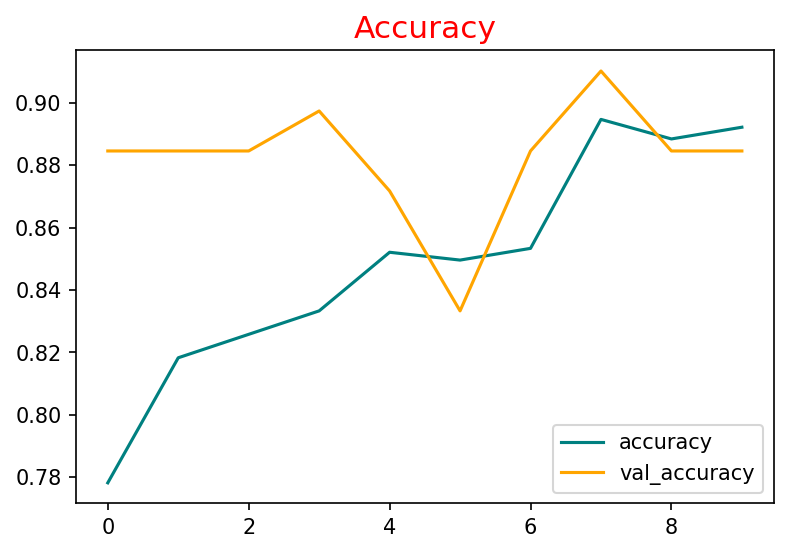

In [ ]:
fig = plt.figure()
plt.figure(dpi=150)
plt.plot(hist4.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist4.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('Accuracy', fontsize=15,color='red')
plt.legend(loc="lower right")
plt.savefig("accuracy_brst.png")
plt.show()

#####Classification Report

In [ ]:
brst_X_test_cnn = brst_X_test
brst_y_test_cnn = brst_y_test
y_pred_cnn = cnn.predict(brst_X_test_cnn)
y_pred_classes_cnn = [np.argmax(element) for element in y_pred_cnn]

print("Classification Report: \n", classification_report(brst_y_test_cnn, y_pred_classes_cnn))

5/5 [==============================] - 0s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.45      0.59        42
           1       0.83      0.97      0.90       114

    accuracy                           0.83       156
   macro avg       0.85      0.71      0.74       156
weighted avg       0.84      0.83      0.81       156



Resampling the imbalanced data increases the accuracy from 0.79 to 0.84.
Also the F1 score for 0 is increased.

#### Predicted Ouput Examples

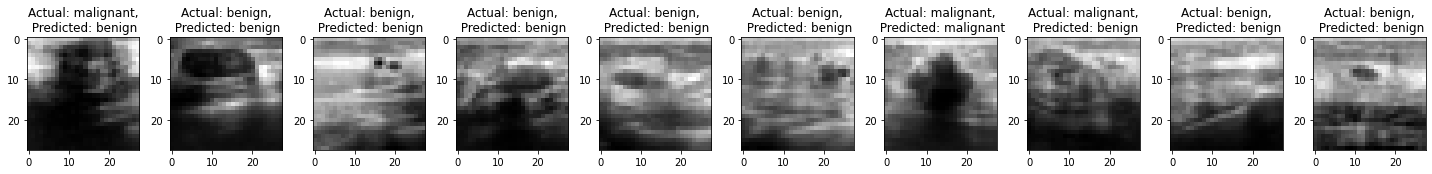

In [ ]:
num_images = 10
brst_labels = ['malignant','benign']
brst_y_pred_labels_cnn = np.array(brst_labels)[y_pred_classes_cnn]
plt.figure(figsize=(20,20))
for i in range(num_images):
    plt.subplot(1,num_images,i+1)
    plt.imshow(brst_X_test_cnn[i], cmap='gray')
    plt.title('Actual: {},\n Predicted: {}'.format(brst_labels[brst_y_test_cnn[i][0]], brst_y_pred_labels_cnn[i]))
plt.tight_layout()

##Bloodmnist

###CNN Model

In [ ]:
num_classes = 8

cnn1 = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [ ]:
cnn1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

hist_bld=cnn1.fit(bld_X_train, bld_y_train, epochs=20,validation_data=(bld_X_val, bld_y_val),callbacks=[tensorboard_callback])
cnn1.evaluate(bld_X_test,bld_y_test)

Epoch 1/20
374/374 [==============================] - 9s 11ms/step - loss: 1.0589 - accuracy: 0.6117 - val_loss: 0.6649 - val_accuracy: 0.7447
Epoch 2/20
374/374 [==============================] - 3s 9ms/step - loss: 0.6280 - accuracy: 0.7684 - val_loss: 0.5453 - val_accuracy: 0.7921
Epoch 3/20
374/374 [==============================] - 3s 9ms/step - loss: 0.5186 - accuracy: 0.8114 - val_loss: 0.4581 - val_accuracy: 0.8382
Epoch 4/20
374/374 [==============================] - 4s 10ms/step - loss: 0.4467 - accuracy: 0.8338 - val_loss: 0.4301 - val_accuracy: 0.8382
Epoch 5/20
374/374 [==============================] - 3s 8ms/step - loss: 0.3919 - accuracy: 0.8517 - val_loss: 0.4163 - val_accuracy: 0.8464
Epoch 6/20
374/374 [==============================] - 3s 7ms/step - loss: 0.3395 - accuracy: 0.8781 - val_loss: 0.3159 - val_accuracy: 0.8826
Epoch 7/20
374/374 [==============================] - 2s 5ms/step - loss: 0.3129 - accuracy: 0.8854 - val_loss: 0.2883 - val_accuracy: 0.9001
Epoc

[0.24894241988658905, 0.920491099357605]

#### Keras Tuner Hypertuning

In [ ]:
def build_model(hp):
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,3)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(8, activation='softmax')
  ])

  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

  return model


In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Blood")

In [ ]:
tuner_search.search(bld_X_train, bld_y_train,epochs=3,validation_data=(bld_X_val,bld_y_val))

Trial 5 Complete [00h 00m 07s]
val_accuracy: 0.1945093423128128

Best val_accuracy So Far: 0.8574766516685486
Total elapsed time: 00h 00m 50s


In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 48)        1344      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        27712     
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 64)                2359360   
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                                 
Total params: 2,388,936
Trainable params: 2,388,936
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1=model.fit(bld_X_train, bld_y_train, epochs=10,validation_data=(bld_X_val,bld_y_val), initial_epoch=3)

Epoch 4/10
374/374 [==============================] - 4s 7ms/step - loss: 0.2858 - accuracy: 0.8965 - val_loss: 0.3179 - val_accuracy: 0.8843
Epoch 5/10
374/374 [==============================] - 2s 5ms/step - loss: 0.2294 - accuracy: 0.9168 - val_loss: 0.3166 - val_accuracy: 0.8890
Epoch 6/10
374/374 [==============================] - 2s 5ms/step - loss: 0.2118 - accuracy: 0.9243 - val_loss: 0.3218 - val_accuracy: 0.8879
Epoch 7/10
374/374 [==============================] - 2s 5ms/step - loss: 0.1710 - accuracy: 0.9380 - val_loss: 0.3315 - val_accuracy: 0.8890
Epoch 8/10
374/374 [==============================] - 2s 5ms/step - loss: 0.1463 - accuracy: 0.9465 - val_loss: 0.2677 - val_accuracy: 0.9153
Epoch 9/10
374/374 [==============================] - 2s 5ms/step - loss: 0.1290 - accuracy: 0.9531 - val_loss: 0.3105 - val_accuracy: 0.9065
Epoch 10/10
374/374 [==============================] - 2s 6ms/step - loss: 0.1031 - accuracy: 0.9621 - val_loss: 0.3503 - val_accuracy: 0.9054


In [ ]:
model.evaluate(bld_X_test,bld_y_test)

107/107 [==============================] - 0s 4ms/step - loss: 0.3428 - accuracy: 0.9021


[0.342833548784256, 0.9020754098892212]

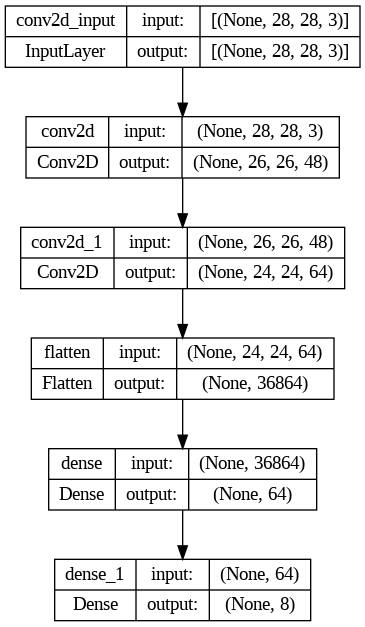

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

#### Plot Performance

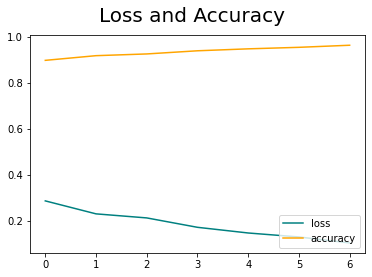

In [ ]:
fig=plt.figure()
plt.plot(history1.history['loss'], color='teal',label='loss')
plt.plot(history1.history['accuracy'],color='orange',label='accuracy')
fig.suptitle('Loss and Accuracy',fontsize=20)
plt.legend(loc="lower right")
plt.show()

<Figure size 432x288 with 0 Axes>

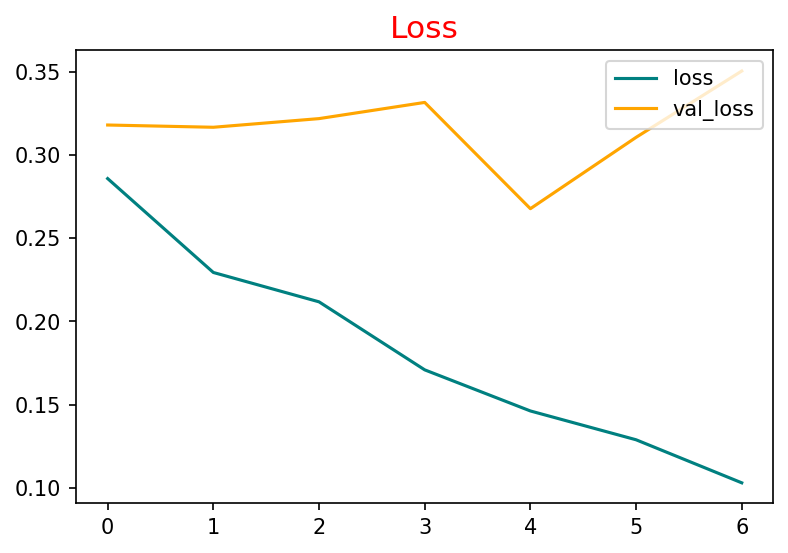

In [ ]:
fig = plt.figure()
plt.figure(dpi=150)
plt.plot(history1.history['loss'], color='teal', label='loss')
plt.plot(history1.history['val_loss'], color='orange', label='val_loss')
plt.title('Loss', fontsize=15,color='red')
plt.legend(loc="upper right")
plt.savefig("loss_bld.png")
plt.show()

<Figure size 432x288 with 0 Axes>

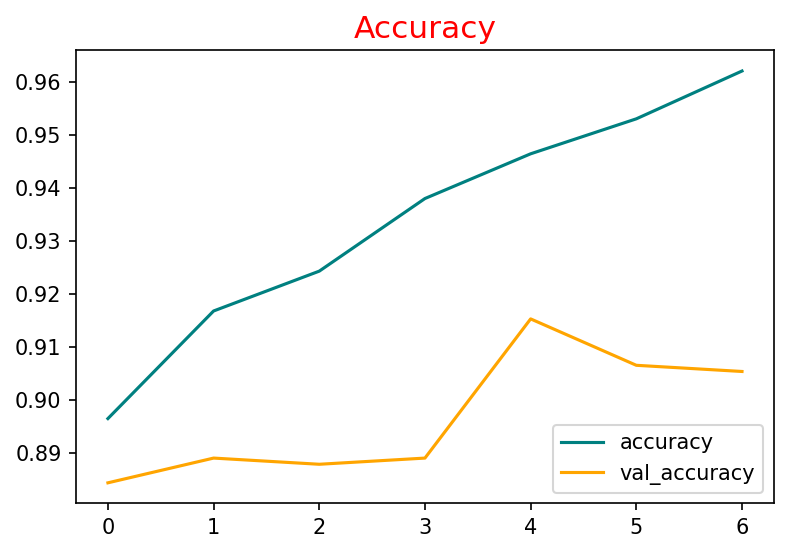

In [ ]:
fig = plt.figure()
plt.figure(dpi=150)
plt.plot(history1.history['accuracy'], color='teal', label='accuracy')
plt.plot(history1.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('Accuracy', fontsize=15,color='red')
plt.legend(loc="lower right")
plt.savefig("accuracy_bld.png")
plt.show()

we can see there is no over fitting

#### Handling the imblanced data

In [ ]:
unique_labels_brst, class_counts_brst = np.unique(brst_y_train, return_counts=True)
print("Unique labels for breastmnist:", unique_labels_brst)
print("Label counts for breastmnist:", class_counts_brst)
unique_labels_bld, class_counts_bld = np.unique(bld_y_train, return_counts=True)
print("Unique labels for bloodmnist:", unique_labels_bld)
print("Label counts for bloodmnist:", class_counts_bld)

Unique labels for breastmnist: [0 1]
Label counts for breastmnist: [147 399]
Unique labels for bloodmnist: [0 1 2 3 4 5 6 7]
Label counts for bloodmnist: [ 852 2181 1085 2026  849  993 2330 1643]


In [ ]:
# Get the maximum count of any class
max_count = class_counts_bld.max()

# Resample the data to balance the classes
bld_X_resampled = []
bld_y_resampled = []
for label in np.unique(bld_y_train):
    label_indices = np.where(bld_y_train == label)[0]
    resampled_indices = np.random.choice(label_indices, size=max_count, replace=True)
    bld_X_resampled.append(bld_X_train[resampled_indices])
    bld_y_resampled.append(bld_y_train[resampled_indices])

# Concatenate the resampled data
bld_X_train_resampled = np.concatenate(bld_X_resampled, axis=0)
bld_y_train_resampled = np.concatenate(bld_y_resampled, axis=0)

# Print the new class distribution
print("Resampled class distribution for Breastmnist:")
unique_labels_bld, class_counts_bld = np.unique(bld_y_train_resampled, return_counts=True)
print("Unique labels for breastmnist:", unique_labels_bld)
print("Label counts for breastmnist:", class_counts_bld)

Resampled class distribution for Breastmnist:
Unique labels for breastmnist: [0 1 2 3 4 5 6 7]
Label counts for breastmnist: [2330 2330 2330 2330 2330 2330 2330 2330]


In [ ]:
history2=model.fit(bld_X_train_resampled, bld_y_train_resampled,validation_data=(bld_X_val,bld_y_val), epochs=10)
score_bld_exs=model.evaluate(bld_X_test,bld_y_test)

Epoch 1/10
583/583 [==============================] - 3s 5ms/step - loss: 0.0877 - accuracy: 0.9701 - val_loss: 0.3831 - val_accuracy: 0.8972
Epoch 2/10
583/583 [==============================] - 3s 5ms/step - loss: 0.0456 - accuracy: 0.9847 - val_loss: 0.3575 - val_accuracy: 0.9100
Epoch 3/10
583/583 [==============================] - 3s 5ms/step - loss: 0.0407 - accuracy: 0.9858 - val_loss: 0.4457 - val_accuracy: 0.9013
Epoch 4/10
583/583 [==============================] - 3s 5ms/step - loss: 0.0472 - accuracy: 0.9849 - val_loss: 0.5447 - val_accuracy: 0.8581
Epoch 5/10
583/583 [==============================] - 3s 5ms/step - loss: 0.0406 - accuracy: 0.9870 - val_loss: 0.4852 - val_accuracy: 0.8984
Epoch 6/10
583/583 [==============================] - 3s 5ms/step - loss: 0.0235 - accuracy: 0.9923 - val_loss: 0.5129 - val_accuracy: 0.9025
Epoch 7/10
583/583 [==============================] - 3s 5ms/step - loss: 0.0427 - accuracy: 0.9859 - val_loss: 0.7830 - val_accuracy: 0.8686
Epoch 

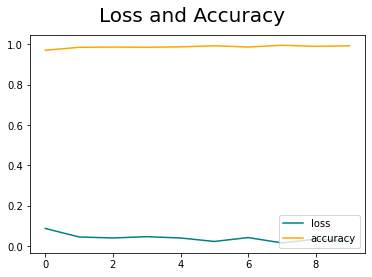

In [ ]:
fig = plt.figure()
plt.plot(history2.history['loss'], color='teal', label='loss')
plt.plot(history2.history['accuracy'], color='orange', label='accuracy')
fig.suptitle('Loss and Accuracy', fontsize=20)
plt.legend(loc="lower right")
plt.show()

<Figure size 432x288 with 0 Axes>

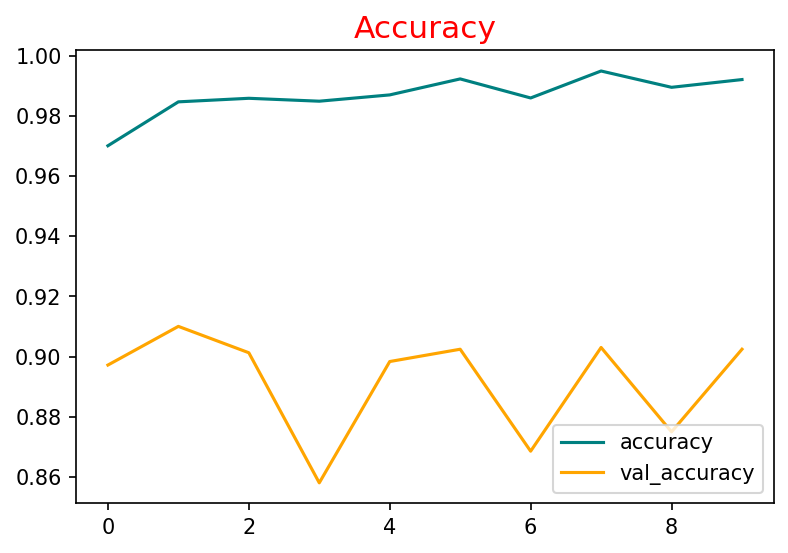

In [ ]:
fig = plt.figure()
plt.figure(dpi=150)
plt.plot(history2.history['accuracy'], color='teal', label='accuracy')
plt.plot(history2.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('Accuracy', fontsize=15,color='red')
plt.legend(loc="lower right")
plt.savefig("accuracy_bld.png")
plt.show()

<Figure size 432x288 with 0 Axes>

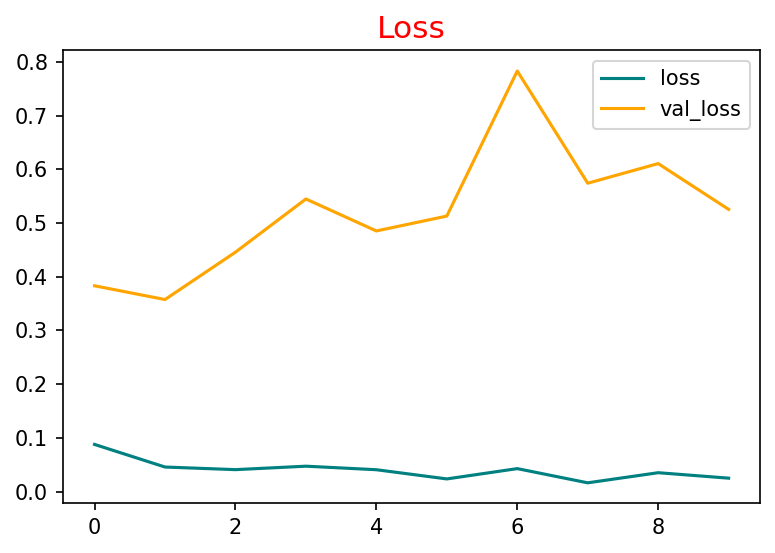

In [ ]:
fig = plt.figure()
plt.figure(dpi=150)
plt.plot(history2.history['loss'], color='teal', label='loss')
plt.plot(history2.history['val_loss'], color='orange', label='val_loss')
plt.title('Loss', fontsize=15,color='red')
plt.legend(loc="upper right")
plt.savefig("loss_bld.png")
plt.show()

#### Classification report

In [ ]:
#Classification report
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
bld_X_test_cnn =bld_X_test
bld_y_test_cnn =bld_y_test
y_pred_bld_cnn = cnn1.predict(bld_X_test_cnn)
y_pred_classes_bld_cnn = [np.argmax(element) for element in y_pred_bld_cnn]

print("Classification Report: \n", classification_report(bld_y_test_cnn, y_pred_classes_bld_cnn))

107/107 [==============================] - 0s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87       244
           1       0.96      0.99      0.98       624
           2       0.89      0.94      0.92       311
           3       0.81      0.85      0.83       579
           4       0.90      0.89      0.90       243
           5       0.88      0.83      0.85       284
           6       0.97      0.93      0.95       666
           7       0.99      1.00      0.99       470

    accuracy                           0.92      3421
   macro avg       0.91      0.91      0.91      3421
weighted avg       0.92      0.92      0.92      3421



#### Predicted Output Examples

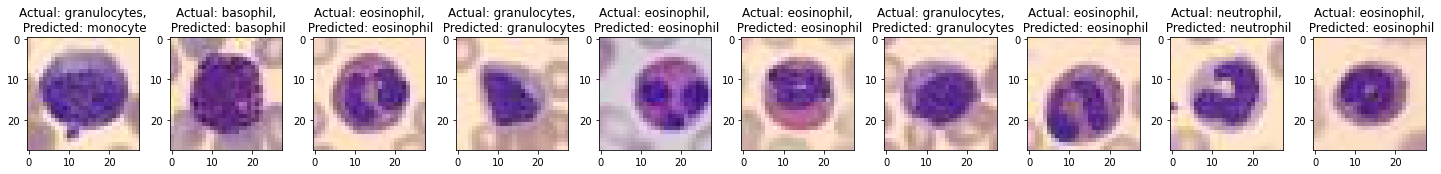

In [ ]:
y_test_new = to_categorical(bld_y_test)
num_images = 10
bld_class_names = [
    'basophil', 'eosinophil', 'erythroblast', 'granulocytes',
    'lymphocyte', 'monocyte', 'neutrophil', 'platelet'
]
bld_y_pred_labels = np.array(bld_class_names)[y_pred_classes_bld_cnn]
plt.figure(figsize=(20,20))
for i in range(num_images):
  plt.subplot(1,num_images,i+1)
  plt.imshow(bld_X_test_cnn[i], cmap='gray')
  plt.title('Actual: {},\n Predicted: {}'.format(bld_class_names[bld_y_test_cnn[i][0]],bld_y_pred_labels[i]))
  plt.tight_layout()

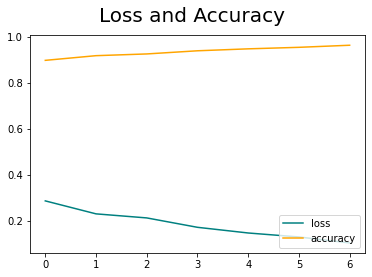

In [ ]:
fig=plt.figure()
plt.plot(history1.history['loss'], color='teal',label='loss')
plt.plot(history1.history['accuracy'],color='orange',label='accuracy')
fig.suptitle('Loss and Accuracy',fontsize=20)
plt.legend(loc="lower right")
plt.show()

<Figure size 432x288 with 0 Axes>

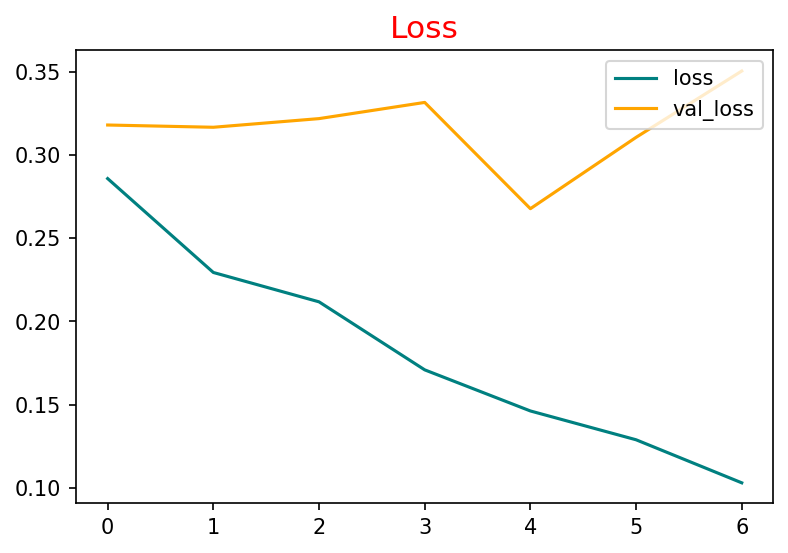

In [ ]:
fig = plt.figure()
plt.figure(dpi=150)
plt.plot(history1.history['loss'], color='teal', label='loss')
plt.plot(history1.history['val_loss'], color='orange', label='val_loss')
plt.title('Loss', fontsize=15,color='red')
plt.legend(loc="upper right")
plt.savefig("loss_bld.png")
plt.show()

<Figure size 432x288 with 0 Axes>

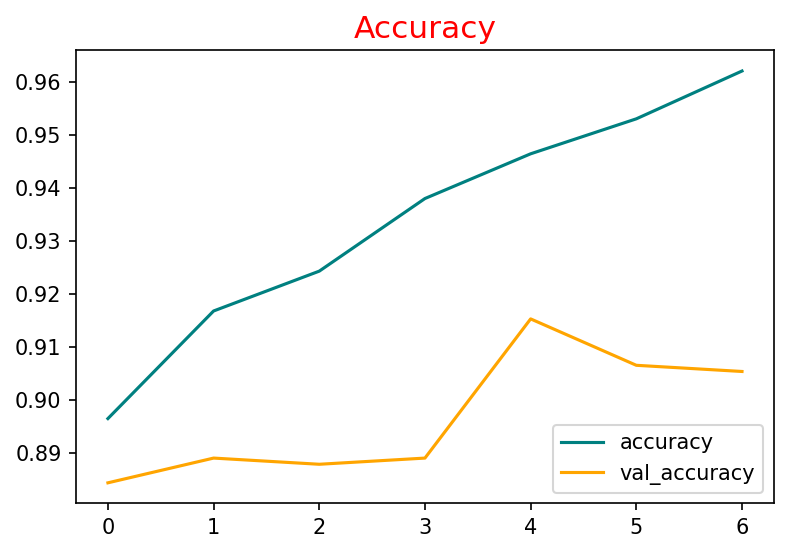

In [ ]:
fig = plt.figure()
plt.figure(dpi=150)
plt.plot(history1.history['accuracy'], color='teal', label='accuracy')
plt.plot(history1.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('Accuracy', fontsize=15,color='red')
plt.legend(loc="lower right")
plt.savefig("accuracy_bld.png")
plt.show()

In [ ]:
tf.keras.callbacks.Callback()

<Figure size 432x288 with 0 Axes>

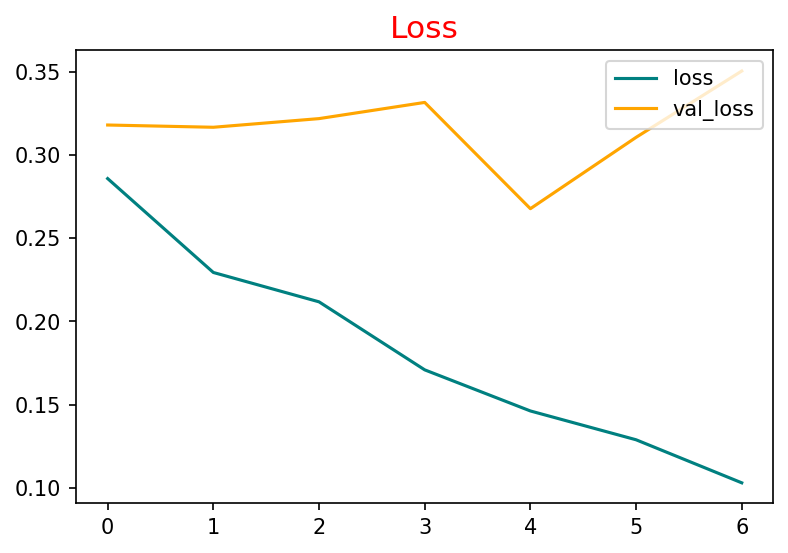

In [ ]:
fig = plt.figure()
plt.figure(dpi=150)
plt.plot(history1.history['loss'], color='teal', label='loss')
plt.plot(history1.history['val_loss'], color='orange', label='val_loss')
plt.title('Loss', fontsize=15,color='red')
plt.legend(loc="upper right")
plt.savefig("loss_bld.png")
plt.show()

<Figure size 432x288 with 0 Axes>

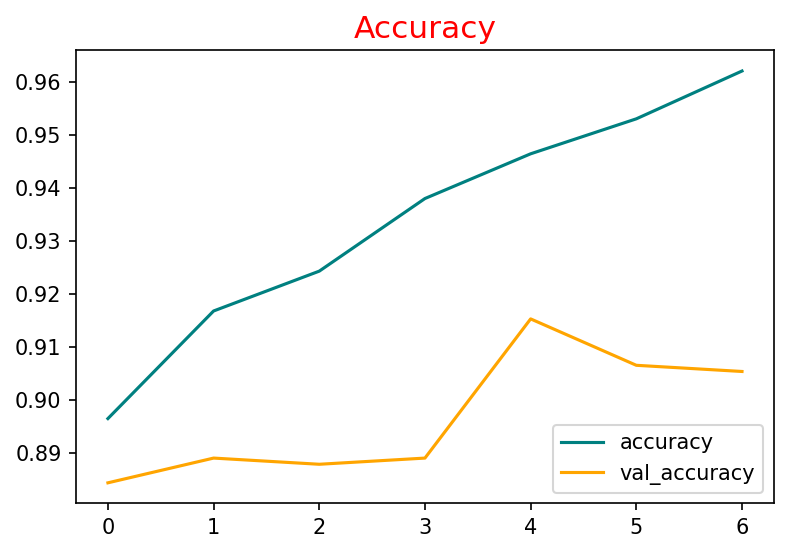

In [ ]:
fig = plt.figure()
plt.figure(dpi=150)
plt.plot(history1.history['accuracy'], color='teal', label='accuracy')
plt.plot(history1.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('Accuracy', fontsize=15,color='red')
plt.legend(loc="lower right")
plt.savefig("accuracy_bld.png")
plt.show()

#### Data augmentatoion

In [ ]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
history3=model.fit(datagen.flow(bld_X_train, bld_y_train, batch_size=32),
                  epochs=10,
                  validation_data=(bld_X_val, bld_y_val))

Epoch 1/10
374/374 [==============================] - 7s 18ms/step - loss: 0.3127 - accuracy: 0.8982 - val_loss: 0.3584 - val_accuracy: 0.8832
Epoch 2/10
374/374 [==============================] - 6s 17ms/step - loss: 0.2294 - accuracy: 0.9172 - val_loss: 0.2600 - val_accuracy: 0.9176
Epoch 3/10
374/374 [==============================] - 6s 16ms/step - loss: 0.2105 - accuracy: 0.9260 - val_loss: 0.3013 - val_accuracy: 0.9036
Epoch 4/10
374/374 [==============================] - 7s 18ms/step - loss: 0.1864 - accuracy: 0.9333 - val_loss: 0.2429 - val_accuracy: 0.9229
Epoch 5/10
374/374 [==============================] - 6s 15ms/step - loss: 0.1599 - accuracy: 0.9408 - val_loss: 0.2570 - val_accuracy: 0.9188
Epoch 6/10
374/374 [==============================] - 7s 18ms/step - loss: 0.1569 - accuracy: 0.9440 - val_loss: 0.2708 - val_accuracy: 0.9153
Epoch 7/10
374/374 [==============================] - 6s 15ms/step - loss: 0.1471 - accuracy: 0.9461 - val_loss: 0.2466 - val_accuracy: 0.9217

In [ ]:
model.evaluate(bld_X_test,bld_y_test)

107/107 [==============================] - 0s 3ms/step - loss: 0.2557 - accuracy: 0.9240


[0.25565290451049805, 0.9239988327026367]

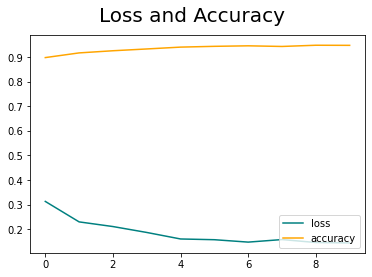

In [ ]:
fig=plt.figure()
plt.plot(history3.history['loss'], color='teal',label='loss')
plt.plot(history3.history['accuracy'],color='orange',label='accuracy')
fig.suptitle('Loss and Accuracy',fontsize=20)
plt.legend(loc="lower right")
plt.show()

<Figure size 432x288 with 0 Axes>

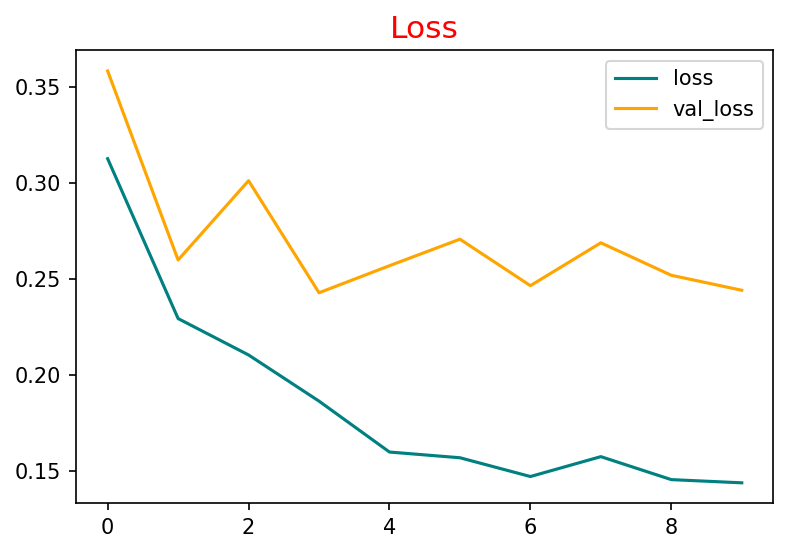

In [ ]:
fig = plt.figure()
plt.figure(dpi=150)
plt.plot(history3.history['loss'], color='teal', label='loss')
plt.plot(history3.history['val_loss'], color='orange', label='val_loss')
plt.title('Loss', fontsize=15,color='red')
plt.legend(loc="upper right")
plt.savefig("loss_bld.png")
plt.show()

<Figure size 432x288 with 0 Axes>

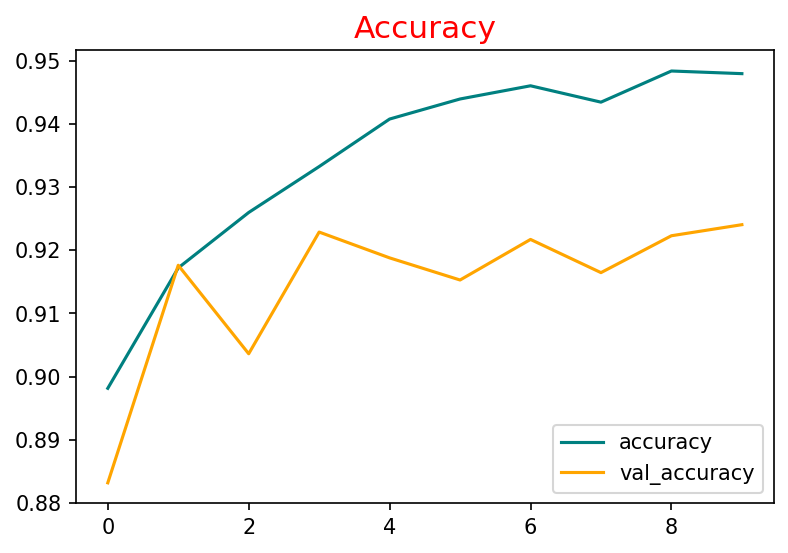

In [ ]:
fig = plt.figure()
plt.figure(dpi=150)
plt.plot(history3.history['accuracy'], color='teal', label='accuracy')
plt.plot(history3.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('Accuracy', fontsize=15,color='red')
plt.legend(loc="lower right")
plt.savefig("accuracy_bld.png")
plt.show()

# Pretrained Models

## Breastmnist

### ResNet50

##### Tuning pretrained model

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the breastminist data for resnet
brst_X_train = brst_data['train_images']
brst_y_train = brst_data['train_labels']
brst_X_test = brst_data['test_images']
brst_y_test = brst_data['test_labels']
brst_X_val = brst_data['val_images']
brst_y_val = brst_data['val_labels']

# Preprocess the data
brst_X_train = np.repeat(brst_X_train[..., np.newaxis], 3, axis=-1)
brst_X_test = np.repeat(brst_X_test[..., np.newaxis], 3, axis=-1)
brst_X_val = np.repeat(brst_X_val[..., np.newaxis], 3, axis=-1)

brst_X_train = tf.image.resize(brst_X_train, size=(224, 224))
brst_X_test = tf.image.resize(brst_X_test, size=(224, 224))
brst_X_val = tf.image.resize(brst_X_val, size=(224, 224))

brst_X_train = tf.keras.applications.resnet50.preprocess_input(brst_X_train)
brst_X_test = tf.keras.applications.resnet50.preprocess_input(brst_X_test)
brst_X_val = tf.keras.applications.resnet50.preprocess_input(brst_X_val)


In [ ]:
# Load the ResNet50 pre-trained model and add additional layers
input_tensor = Input(shape=(224, 224, 3))
base_model = ResNet50(include_top=False, weights='imagenet', input_tensor=input_tensor)

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_tensor = Dense(1, activation='sigmoid')(x)

resnet_model = Model(inputs=input_tensor, outputs=output_tensor)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
resnet_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# Train the model
reshist = resnet_model.fit(brst_X_train, brst_y_train, batch_size=32, epochs=10, validation_data=(brst_X_val, brst_y_val))

Epoch 1/10
18/18 [==============================] - 9s 245ms/step - loss: 1.1435 - accuracy: 0.7308 - val_loss: 0.9864 - val_accuracy: 0.8333
Epoch 2/10
18/18 [==============================] - 2s 115ms/step - loss: 0.5279 - accuracy: 0.8681 - val_loss: 0.4661 - val_accuracy: 0.8846
Epoch 3/10
18/18 [==============================] - 2s 114ms/step - loss: 0.1819 - accuracy: 0.9377 - val_loss: 0.3470 - val_accuracy: 0.8846
Epoch 4/10
18/18 [==============================] - 2s 108ms/step - loss: 0.0936 - accuracy: 0.9744 - val_loss: 0.3166 - val_accuracy: 0.9103
Epoch 5/10
18/18 [==============================] - 2s 112ms/step - loss: 0.0572 - accuracy: 0.9853 - val_loss: 0.4081 - val_accuracy: 0.8846
Epoch 6/10
18/18 [==============================] - 2s 113ms/step - loss: 0.0413 - accuracy: 0.9908 - val_loss: 0.3769 - val_accuracy: 0.8974
Epoch 7/10
18/18 [==============================] - 2s 108ms/step - loss: 0.0219 - accuracy: 0.9963 - val_loss: 0.3404 - val_accuracy: 0.9359
Epoch 

In [ ]:
resnet_model.evaluate(brst_X_test,brst_y_test)

5/5 [==============================] - 1s 255ms/step - loss: 0.5936 - accuracy: 0.8782


[0.5935716032981873, 0.8782051205635071]

##### Plot Performance

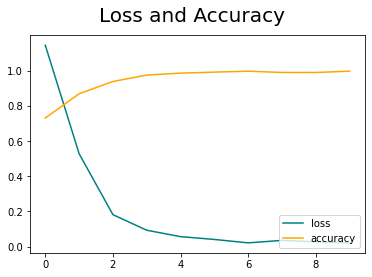

In [ ]:
fig = plt.figure()
plt.plot(reshist.history['loss'], color='teal', label='loss')
plt.plot(reshist.history['accuracy'], color='orange', label='accuracy')
fig.suptitle('Loss and Accuracy', fontsize=20)
plt.legend(loc="lower right")
plt.show()

<Figure size 432x288 with 0 Axes>

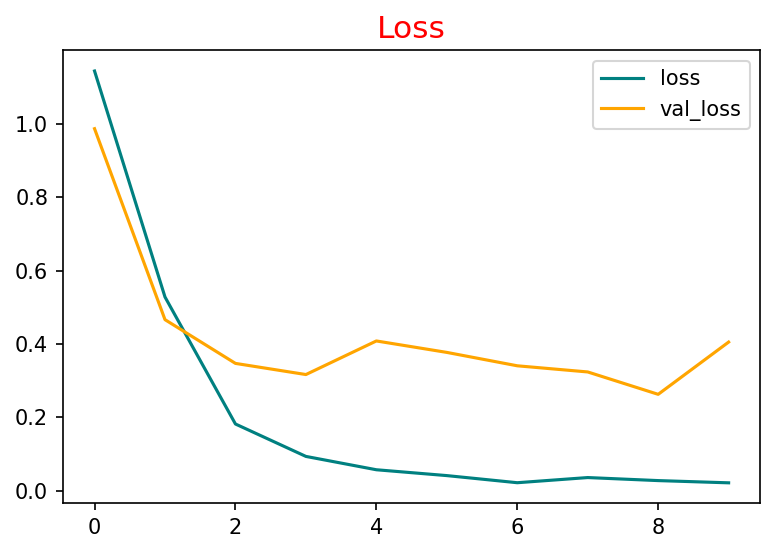

In [ ]:
fig = plt.figure()
plt.figure(dpi=150)
plt.plot(reshist.history['loss'], color='teal', label='loss')
plt.plot(reshist.history['val_loss'], color='orange', label='val_loss')
plt.title('Loss', fontsize=15,color='red')
plt.legend(loc="upper right")
plt.savefig("loss_brst.png")
plt.show()

<Figure size 432x288 with 0 Axes>

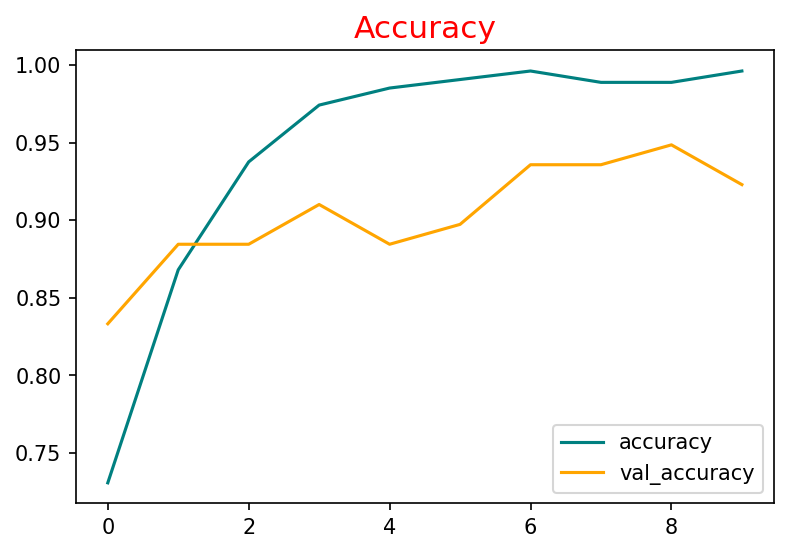

In [ ]:
fig = plt.figure()
plt.figure(dpi=150)
plt.plot(reshist.history['accuracy'], color='teal', label='accuracy')
plt.plot(reshist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('Accuracy', fontsize=15,color='red')
plt.legend(loc="lower right")
plt.savefig("accuracy_brst.png")
plt.show()

#####Classification Report

In [ ]:
# Predict class labels for the test set
brst_X_test_res = brst_X_test
brst_y_test_res = brst_y_test
y_pred_bres = resnet_model.predict(brst_X_test_res)
y_pred_class_bres = np.round(y_pred_bres)

# classification report
print(classification_report(brst_y_test_res, y_pred_class_bres))




5/5 [==============================] - 2s 108ms/step
              precision    recall  f1-score   support

           0       0.87      0.64      0.74        42
           1       0.88      0.96      0.92       114

    accuracy                           0.88       156
   macro avg       0.88      0.80      0.83       156
weighted avg       0.88      0.88      0.87       156



## Bloodmnist

### ResNet50

##### Tuning pretrained model

In [ ]:
# Get the data and labels for breastmnist
bld_X_train = bld_data['train_images']
bld_y_train = bld_data['train_labels']
bld_X_test = bld_data['test_images']
bld_y_test = bld_data['test_labels']
bld_X_val = bld_data['val_images']
bld_y_val = bld_data['val_labels']
bld_X_train = bld_X_train.astype('float32') / 255.0
bld_X_test = bld_X_test.astype('float32') / 255.0
bld_X_val = bld_X_val.astype('float32') / 255.0

In [ ]:
#one hot encoding
from keras.utils import to_categorical
bld_y_train = to_categorical(bld_y_train, num_classes = 8, dtype ="int32")
bld_y_test = to_categorical(bld_y_test, num_classes = 8, dtype ="int32")
bld_y_val = to_categorical(bld_y_val, num_classes = 8, dtype ="int32")
bld_X_train = tf.image.resize(bld_X_train, size=(64, 64))
bld_X_test = tf.image.resize(bld_X_test, size=(64, 64))
bld_X_val = tf.image.resize(bld_X_val, size=(64, 64))
print("Bloodmnist train data shape:",bld_X_train.shape)
print("Bloodmnist test data shape:",bld_X_test.shape)
print("Bloodmnist val data shape:",bld_X_val.shape)

Bloodmnist train data shape: (11959, 64, 64, 3)
Bloodmnist test data shape: (3421, 64, 64, 3)
Bloodmnist val data shape: (1712, 64, 64, 3)


In [ ]:
resnet_bld_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(64,64,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_bld_model.add(pretrained_model)
resnet_bld_model.add(Flatten())
resnet_bld_model.add(Dense(512, activation='relu'))
resnet_bld_model.add(Dense(8, activation='softmax'))

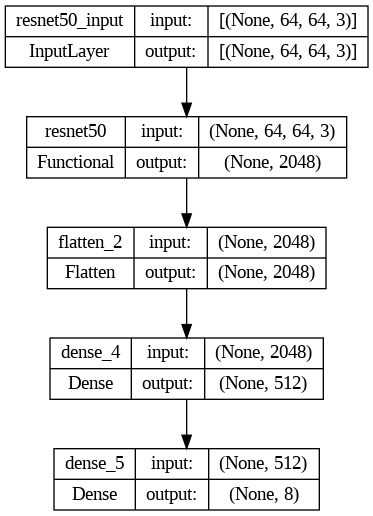

In [ ]:
# Compile
resnet_bld_model.compile(loss='categorical_crossentropy',
                     optimizer=Adam(learning_rate=1e-4),
                     metrics=['accuracy'])
keras.utils.plot_model(resnet_bld_model, show_shapes=True)

In [ ]:
bldreshist=resnet_bld_model.fit(bld_X_train, bld_y_train, epochs=10,validation_data=(bld_X_val, bld_y_val))

Epoch 1/10
374/374 [==============================] - 13s 23ms/step - loss: 1.9220 - accuracy: 0.3027 - val_loss: 1.8303 - val_accuracy: 0.3919
Epoch 2/10
374/374 [==============================] - 7s 18ms/step - loss: 1.7460 - accuracy: 0.4605 - val_loss: 1.6509 - val_accuracy: 0.4743
Epoch 3/10
374/374 [==============================] - 7s 19ms/step - loss: 1.5797 - accuracy: 0.4897 - val_loss: 1.4892 - val_accuracy: 0.4994
Epoch 4/10
374/374 [==============================] - 7s 18ms/step - loss: 1.4415 - accuracy: 0.5054 - val_loss: 1.3756 - val_accuracy: 0.5520
Epoch 5/10
374/374 [==============================] - 7s 18ms/step - loss: 1.3394 - accuracy: 0.5326 - val_loss: 1.2844 - val_accuracy: 0.5631
Epoch 6/10
374/374 [==============================] - 7s 19ms/step - loss: 1.2657 - accuracy: 0.5574 - val_loss: 1.2227 - val_accuracy: 0.5415
Epoch 7/10
374/374 [==============================] - 7s 19ms/step - loss: 1.2105 - accuracy: 0.5782 - val_loss: 1.1721 - val_accuracy: 0.587

In [ ]:
resnet_bld_model.evaluate(bld_X_test,bld_y_test)

107/107 [==============================] - 2s 20ms/step - loss: 1.0993 - accuracy: 0.6305


[1.0993366241455078, 0.6305173635482788]

#####Plot Performance

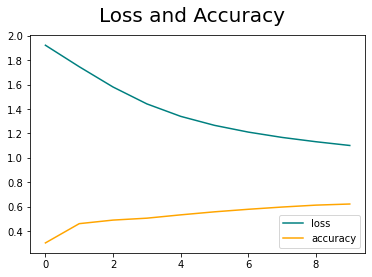

In [ ]:
fig = plt.figure()
plt.plot(bldreshist.history['loss'], color='teal', label='loss')
plt.plot(bldreshist.history['accuracy'], color='orange', label='accuracy')
fig.suptitle('Loss and Accuracy', fontsize=20)
plt.legend(loc="lower right")
plt.show()

<Figure size 432x288 with 0 Axes>

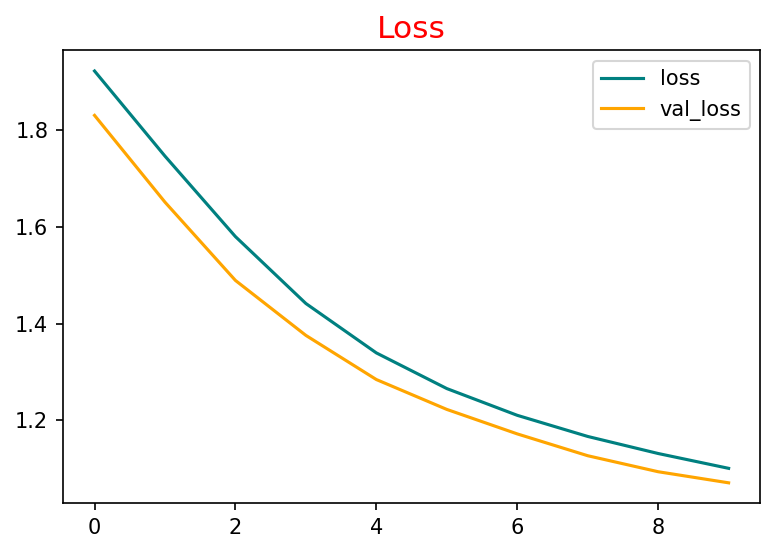

In [ ]:
fig = plt.figure()
plt.figure(dpi=150)
plt.plot(bldreshist.history['loss'], color='teal', label='loss')
plt.plot(bldreshist.history['val_loss'], color='orange', label='val_loss')
plt.title('Loss', fontsize=15,color='red')
plt.legend(loc="upper right")
plt.savefig("loss_brst.png")
plt.show()

<Figure size 432x288 with 0 Axes>

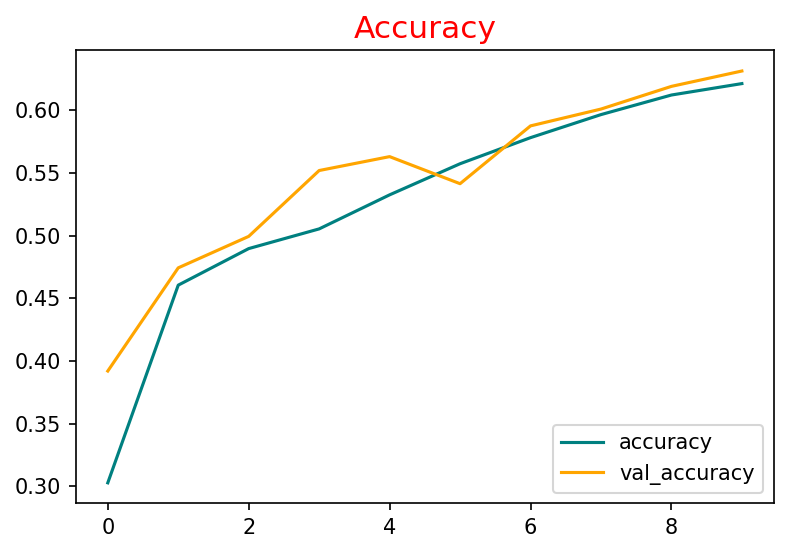

In [ ]:
fig = plt.figure()
plt.figure(dpi=150)
plt.plot(bldreshist.history['accuracy'], color='teal', label='accuracy')
plt.plot(bldreshist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('Accuracy', fontsize=15,color='red')
plt.legend(loc="lower right")
plt.savefig("accuracy_brst.png")
plt.show()

#####Classification Report

In [ ]:
#Classification report
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
bld_X_test_res =bld_X_test
bld_y_test_res =bld_y_test
bldres_y_pred = resnet_bld_model.predict(bld_X_test_res)
bldres_y_pred_classes = [np.argmax(element) for element in bldres_y_pred]
y_pred_bld_res = np.argmax(bldres_y_pred, axis=1)
y_true_bld_res = np.argmax(bld_y_test_res, axis=1)

# generate classification report
target_names = [
    'basophil', 'eosinophil', 'erythroblast', 'granulocytes',
    'lymphocyte', 'monocyte', 'neutrophil', 'platelet'
]
print(classification_report(y_true_bld_res, y_pred_bld_res, target_names=target_names))

107/107 [==============================] - 2s 14ms/step
              precision    recall  f1-score   support

    basophil       0.45      0.10      0.17       244
  eosinophil       0.50      0.73      0.59       624
erythroblast       0.64      0.58      0.61       311
granulocytes       0.48      0.59      0.53       579
  lymphocyte       0.70      0.54      0.61       243
    monocyte       0.41      0.17      0.24       284
  neutrophil       0.80      0.79      0.80       666
    platelet       0.90      0.97      0.93       470

    accuracy                           0.63      3421
   macro avg       0.61      0.56      0.56      3421
weighted avg       0.63      0.63      0.61      3421



### MobileNetV2

##### Tuning pretrained model

9406464/9406464 [==============================] - 0s 0us/step


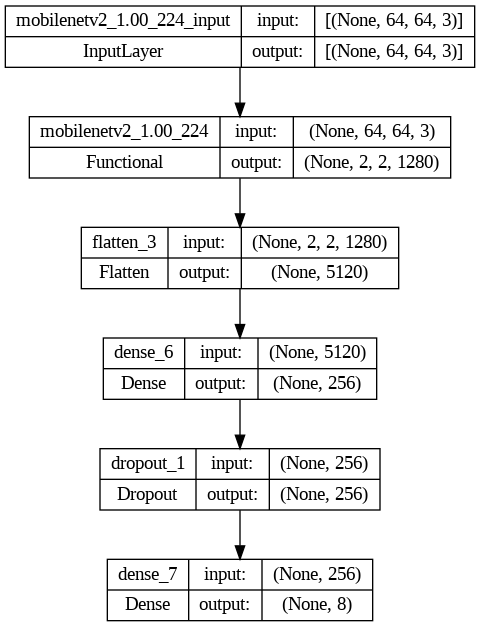

In [ ]:
# Create MobileNetV2 model
model_mnv2_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
num_class = 8
model_mob = Sequential()
model_mob.add(model_mnv2_base)
model_mob.add(Flatten())
model_mob.add(Dense(256, activation='relu'))
model_mob.add(Dropout(0.5))
model_mob.add(Dense(num_class, activation='softmax'))

# Compile the model
model_mob.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

keras.utils.plot_model(model_mob, show_shapes=True)

In [ ]:
# Get the data and labels for breastmnist
bld_X_train = bld_data['train_images']
bld_y_train = bld_data['train_labels']
bld_X_test = bld_data['test_images']
bld_y_test = bld_data['test_labels']
bld_X_val = bld_data['val_images']
bld_y_val = bld_data['val_labels']
bld_X_train = bld_X_train.astype('float32') / 255.0
bld_X_test = bld_X_test.astype('float32') / 255.0
bld_X_val = bld_X_val.astype('float32') / 255.0

In [ ]:
# one hot encoding
bld_y_train = to_categorical(bld_y_train, num_classes = 8, dtype ="int32")
bld_y_test = to_categorical(bld_y_test, num_classes = 8, dtype ="int32")
bld_y_val = to_categorical(bld_y_val, num_classes = 8, dtype ="int32")

In [ ]:
# Re-sizing to match the minimum size requirement for MobileNetV2
bld_X_train = tf.image.resize(bld_X_train, size=(64, 64))
bld_X_test = tf.image.resize(bld_X_test, size=(64, 64))
bld_X_val = tf.image.resize(bld_X_val, size=(64, 64))

In [ ]:
# Train the model with data augmentation
r = model_mob.fit(datagen.flow(bld_X_train, bld_y_train, batch_size=10),
                              epochs=5,
                              validation_data=(bld_X_val, bld_y_val))

Epoch 1/5
1196/1196 [==============================] - 72s 39ms/step - loss: 1.2550 - accuracy: 0.5886 - val_loss: 1.7672 - val_accuracy: 0.4241
Epoch 2/5
1196/1196 [==============================] - 45s 37ms/step - loss: 0.8043 - accuracy: 0.7247 - val_loss: 1.2182 - val_accuracy: 0.5789
Epoch 3/5
1196/1196 [==============================] - 43s 36ms/step - loss: 0.6328 - accuracy: 0.7862 - val_loss: 0.4779 - val_accuracy: 0.8423
Epoch 4/5
1196/1196 [==============================] - 43s 36ms/step - loss: 0.5497 - accuracy: 0.8153 - val_loss: 0.3490 - val_accuracy: 0.8697
Epoch 5/5
1196/1196 [==============================] - 45s 38ms/step - loss: 0.4529 - accuracy: 0.8478 - val_loss: 0.4022 - val_accuracy: 0.8645


In [ ]:
model_mob.evaluate(bld_X_test,bld_y_test)

107/107 [==============================] - 1s 10ms/step - loss: 0.4357 - accuracy: 0.8606


[0.43573296070098877, 0.8605670928955078]

#####Plot Performance

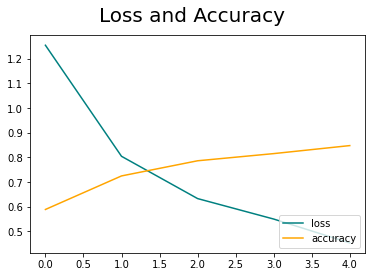

In [ ]:
fig = plt.figure()
plt.plot(r.history['loss'], color='teal', label='loss')
plt.plot(r.history['accuracy'], color='orange', label='accuracy')
fig.suptitle('Loss and Accuracy', fontsize=20)
plt.legend(loc="lower right")
plt.show()

<Figure size 432x288 with 0 Axes>

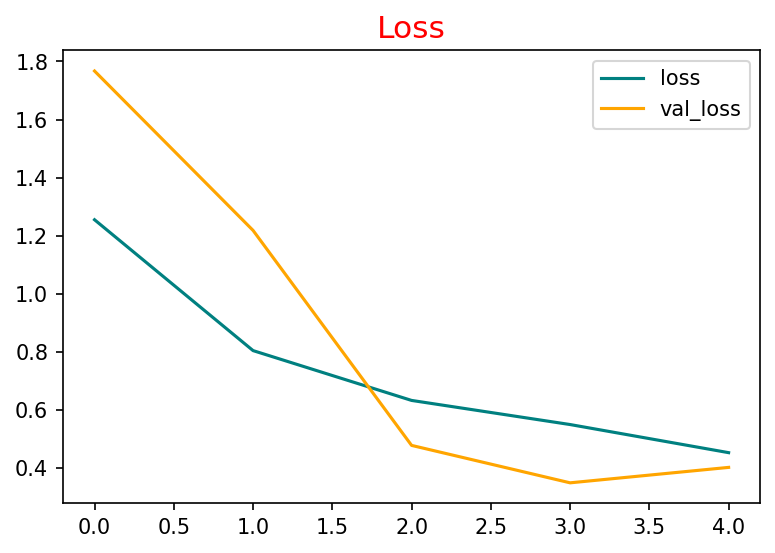

In [ ]:
fig = plt.figure()
plt.figure(dpi=150)
plt.plot(r.history['loss'], color='teal', label='loss')
plt.plot(r.history['val_loss'], color='orange', label='val_loss')
plt.title('Loss', fontsize=15,color='red')
plt.legend(loc="upper right")
plt.savefig("loss_brst.png")
plt.show()

<Figure size 432x288 with 0 Axes>

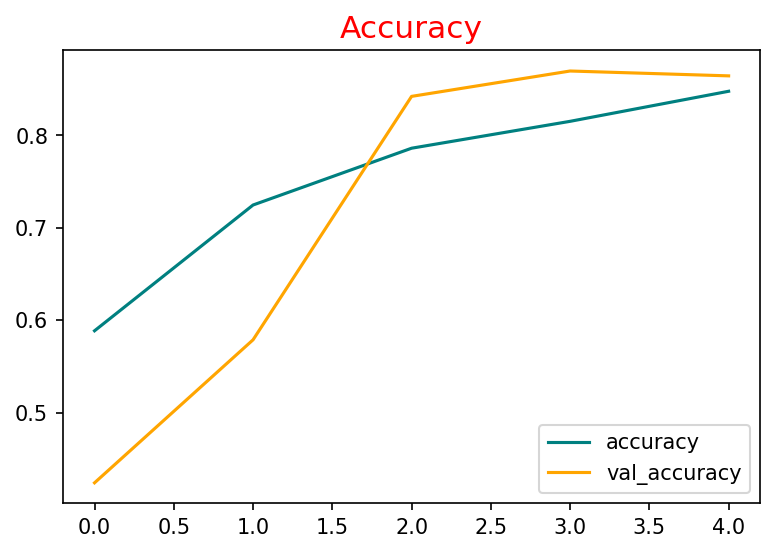

In [ ]:
fig = plt.figure()
plt.figure(dpi=150)
plt.plot(r.history['accuracy'], color='teal', label='accuracy')
plt.plot(r.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('Accuracy', fontsize=15,color='red')
plt.legend(loc="lower right")
plt.savefig("accuracy_brst.png")
plt.show()

#####Classification Report

In [ ]:
bld_X_test_mob =bld_X_test
bld_y_test_mob =bld_y_test
y_pred_mob = model_mob.predict(bld_X_test_mob)
y_pred_classes_mob = [np.argmax(element) for element in y_pred_mob]
y_test_int_mob = np.argmax(bld_y_test_mob, axis=1)
y_pred_int_mob = np.argmax(y_pred_mob, axis=1)

# Print classification report
print("Classification Report: \n", classification_report(y_test_int_mob, y_pred_int_mob))

107/107 [==============================] - 1s 7ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.49      1.00      0.65       244
           1       0.98      0.97      0.98       624
           2       0.96      0.84      0.90       311
           3       0.76      0.65      0.70       579
           4       0.85      0.86      0.86       243
           5       0.94      0.52      0.67       284
           6       0.96      0.96      0.96       666
           7       1.00      0.99      0.99       470

    accuracy                           0.86      3421
   macro avg       0.87      0.85      0.84      3421
weighted avg       0.89      0.86      0.86      3421



# Model Evaluation

##Breastmnist CNN

In [ ]:
y_pred_cnn = cnn.predict(brst_X_test_cnn)
y_pred_classes_cnn = [np.argmax(element) for element in y_pred_cnn]

print("Classification Report: \n", classification_report(brst_y_test_cnn, y_pred_classes_cnn))

5/5 [==============================] - 0s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.45      0.59        42
           1       0.83      0.97      0.90       114

    accuracy                           0.83       156
   macro avg       0.85      0.71      0.74       156
weighted avg       0.84      0.83      0.81       156



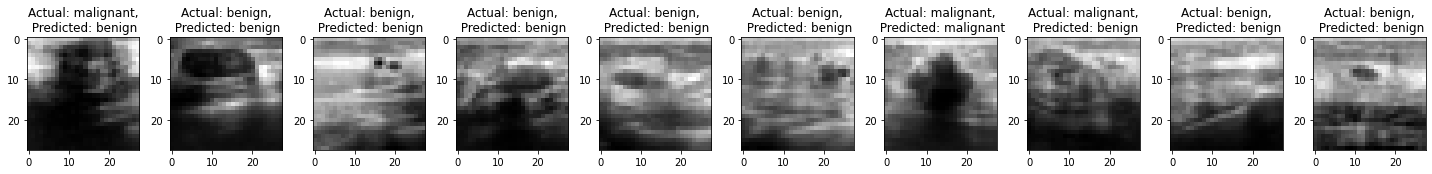

In [ ]:
num_images = 10
brst_labels = ['malignant','benign']
brst_y_pred_labels_cnn = np.array(brst_labels)[y_pred_classes_cnn]
plt.figure(figsize=(20,20))
for i in range(num_images):
    plt.subplot(1,num_images,i+1)
    plt.imshow(brst_X_test_cnn[i], cmap='gray')
    plt.title('Actual: {},\n Predicted: {}'.format(brst_labels[brst_y_test_cnn[i][0]], brst_y_pred_labels_cnn[i]))
plt.tight_layout()

###Prediction of Model

In [ ]:
print(f"Prediction \n {y_pred_cnn[:1]}")

Prediction 
 [[0.20110947 0.6487761 ]]


### Confusion Matrix

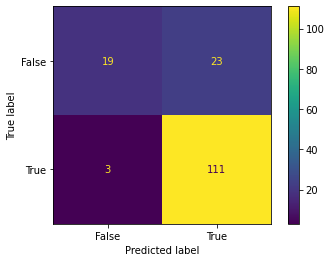

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(brst_y_test_cnn, y_pred_classes_cnn)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[ 19  23]
 [  3 111]]


###AUC of Model

5/5 [==============================] - 0s 3ms/step


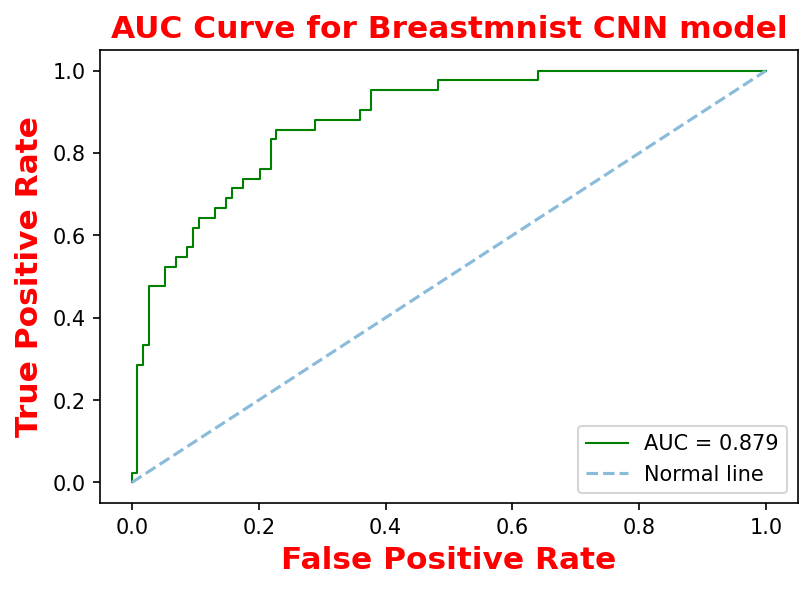

In [ ]:
# Get false and true positive rates
probas=cnn.predict(brst_X_test_cnn)
fpr, tpr, thresholds = roc_curve(brst_y_test_cnn, probas[:,0], pos_label=0)

# Get area under the curve
roc_auc = auc(fpr, tpr)
x_points=np.arange(0,1.1,0.1)
y_points=np.arange(0,1.1,0.1)

# Plot ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.plot(x_points, y_points, linestyle = 'dashed',label=f'Normal line')
plt.title('AUC Curve for Breastmnist CNN model',color='red',fontweight='bold',fontsize=15)
plt.xlabel('False Positive Rate',color='red',fontweight='bold',fontsize=15)
plt.ylabel('True Positive Rate',color='red',fontweight='bold',fontsize=15)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend(loc="lower right")
#plt.savefig("AUC_brst.png")
plt.show()

##Breastmnist ResNet50

###Prediction of Model

In [ ]:
# Predict class labels for the test set
brst_X_test_res = brst_X_test
brst_y_test_res = brst_y_test
y_pred_bres = resnet_model.predict(brst_X_test_res)
y_pred_class_bres = np.round(y_pred_bres)

# classification report
print(classification_report(brst_y_test_res, y_pred_class_bres))

5/5 [==============================] - 0s 91ms/step
              precision    recall  f1-score   support

           0       0.87      0.64      0.74        42
           1       0.88      0.96      0.92       114

    accuracy                           0.88       156
   macro avg       0.88      0.80      0.83       156
weighted avg       0.88      0.88      0.87       156



### Confusion Matrix

Confusion Matrix:
 [[ 27  15]
 [  4 110]]


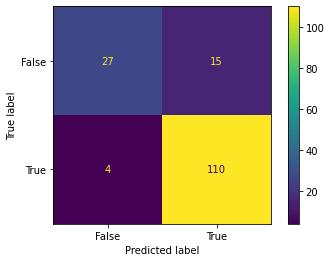

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix
cm = confusion_matrix(brst_y_test_res, y_pred_class_bres)
print('Confusion Matrix:\n', cm)

# Plot confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()
plt.show()

###AUC of Model

5/5 [==============================] - 0s 92ms/step


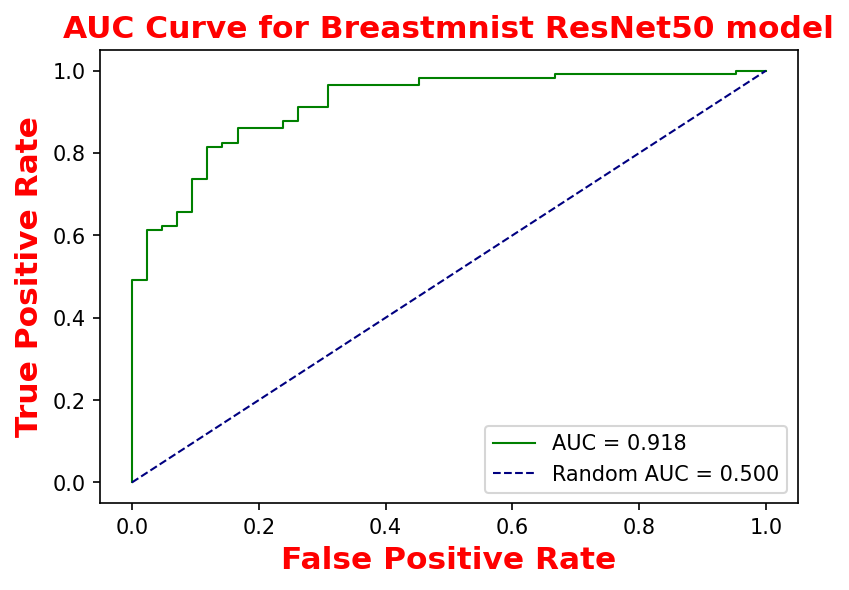

In [ ]:
#AUC curve
from sklearn.metrics import roc_curve, auc
probas = resnet_model.predict(brst_X_test_res)
fpr, tpr, thresholds = roc_curve(brst_y_test_res, probas, pos_label=1)
roc_auc = auc(fpr, tpr)

#Random guess line
rand_probs = [0 for _ in range(len(brst_y_test))]
rand_fpr, rand_tpr, _ = roc_curve(brst_y_test, rand_probs, pos_label=1)
rand_auc = auc(rand_fpr, rand_tpr)

#Plot ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.plot(rand_fpr, rand_tpr, linestyle='--', lw=1, color='navy', label=f'Random AUC = {rand_auc:.3f}')
plt.title('AUC Curve for Breastmnist ResNet50 model',color='red',fontweight='bold',fontsize=15)
plt.xlabel('False Positive Rate',color='red',fontweight='bold',fontsize=15)
plt.ylabel('True Positive Rate',color='red',fontweight='bold',fontsize=15)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend(loc='lower right')
plt.show()

##Bloodmnist CNN

In [ ]:
y_pred_bld_cnn = cnn1.predict(bld_X_test_cnn)
y_pred_classes_bld_cnn = [np.argmax(element) for element in y_pred_bld_cnn]

print("Classification Report: \n", classification_report(bld_y_test_cnn, y_pred_classes_bld_cnn))

107/107 [==============================] - 0s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87       244
           1       0.96      0.99      0.98       624
           2       0.89      0.94      0.92       311
           3       0.81      0.85      0.83       579
           4       0.90      0.89      0.90       243
           5       0.88      0.83      0.85       284
           6       0.97      0.93      0.95       666
           7       0.99      1.00      0.99       470

    accuracy                           0.92      3421
   macro avg       0.91      0.91      0.91      3421
weighted avg       0.92      0.92      0.92      3421



###Prediction of Model

In [ ]:
print("Prediction \n", y_pred_bld_cnn[:1])

Prediction 
 [[ -2.4832757   -9.591917     2.7884052    5.5572495    0.08873404
    6.5588174   -5.955395   -12.088262  ]]


### Confusion Matrix

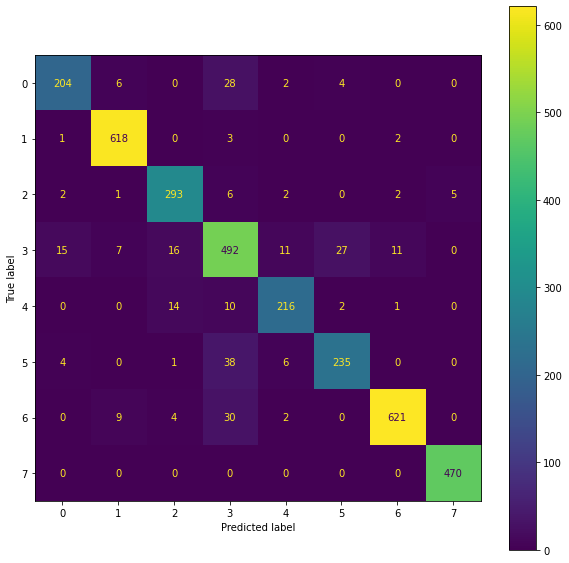

In [ ]:
y_test_new = to_categorical(bld_y_test_cnn)
y_test_numbers = np.array([y.argmax() for y in y_test_new])
cm = confusion_matrix(y_test_numbers, y_pred_classes_bld_cnn)
cm_display = ConfusionMatrixDisplay(cm,display_labels=unique_labels_bld)
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)

In [ ]:
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[204   6   0  28   2   4   0   0]
 [  1 618   0   3   0   0   2   0]
 [  2   1 293   6   2   0   2   5]
 [ 15   7  16 492  11  27  11   0]
 [  0   0  14  10 216   2   1   0]
 [  4   0   1  38   6 235   0   0]
 [  0   9   4  30   2   0 621   0]
 [  0   0   0   0   0   0   0 470]]


###AUC of Model

107/107 [==============================] - 0s 2ms/step


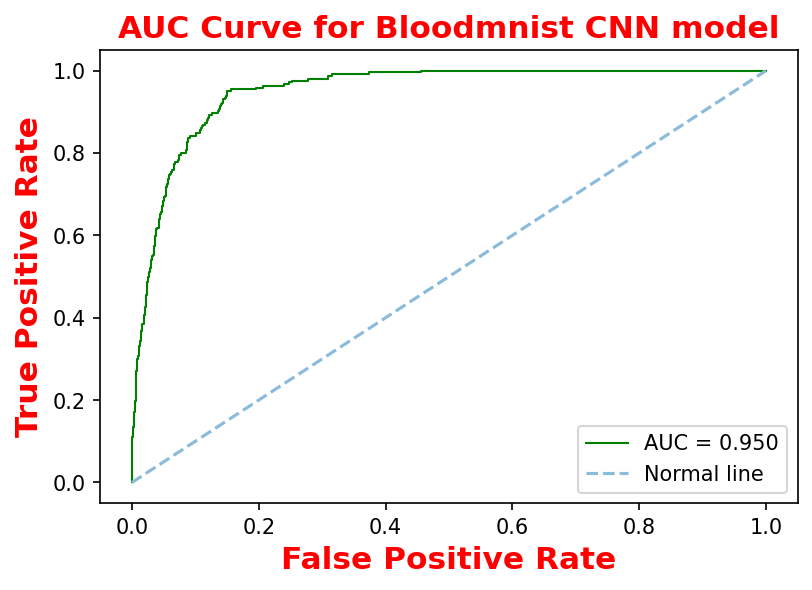

In [ ]:
# Get false and true positive rates
probas1=cnn1.predict(bld_X_test_cnn)
fpr, tpr, thresholds = roc_curve(bld_y_test_cnn, probas1[:,0], pos_label=0)

# Get area under the curve
roc_auc = auc(fpr, tpr)
x_points=np.arange(0,1.1,0.1)
y_points=np.arange(0,1.1,0.1)

# Plot ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.plot(x_points, y_points, linestyle = 'dashed',label=f'Normal line')
plt.title('AUC Curve for Bloodmnist CNN model',color='red',fontweight='bold',fontsize=15)
plt.xlabel('False Positive Rate',color='red',fontweight='bold',fontsize=15)
plt.ylabel('True Positive Rate',color='red',fontweight='bold',fontsize=15)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.savefig("AUC_bld.jpg")
plt.legend()
plt.show()

##Bloodmnist ResNet50

In [ ]:
bldres_y_pred = resnet_bld_model.predict(bld_X_test_res)
bldres_y_pred_classes = [np.argmax(element) for element in bldres_y_pred]
y_pred_bld_res = np.argmax(bldres_y_pred, axis=1)
y_true_bld_res = np.argmax(bld_y_test_res, axis=1)

# generate classification report
target_names = [
    'basophil', 'eosinophil', 'erythroblast', 'granulocytes',
    'lymphocyte', 'monocyte', 'neutrophil', 'platelet'
]
print(classification_report(y_true_bld_res, y_pred_bld_res, target_names=target_names))

107/107 [==============================] - 2s 14ms/step
              precision    recall  f1-score   support

    basophil       0.45      0.10      0.17       244
  eosinophil       0.50      0.73      0.59       624
erythroblast       0.64      0.58      0.61       311
granulocytes       0.48      0.59      0.53       579
  lymphocyte       0.70      0.54      0.61       243
    monocyte       0.41      0.17      0.24       284
  neutrophil       0.80      0.79      0.80       666
    platelet       0.90      0.97      0.93       470

    accuracy                           0.63      3421
   macro avg       0.61      0.56      0.56      3421
weighted avg       0.63      0.63      0.61      3421



###Prediction of Model

### Confusion Matrix

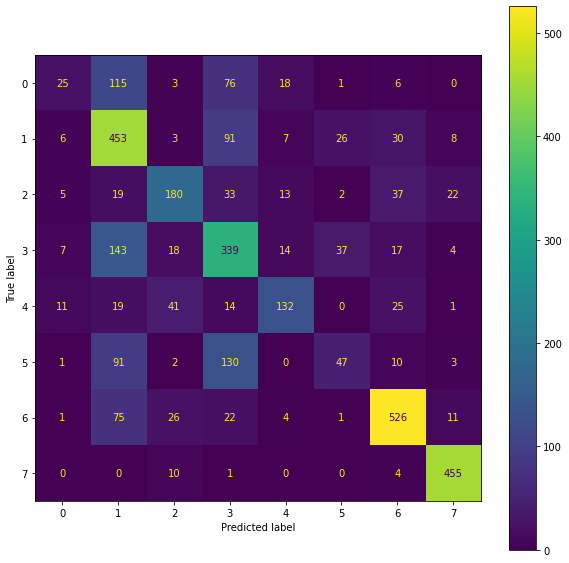

In [ ]:
cm = confusion_matrix(y_true_bld_res, y_pred_bld_res)
cm_display = ConfusionMatrixDisplay(cm,display_labels=unique_labels_bld)
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)

In [ ]:
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[ 25 115   3  76  18   1   6   0]
 [  6 453   3  91   7  26  30   8]
 [  5  19 180  33  13   2  37  22]
 [  7 143  18 339  14  37  17   4]
 [ 11  19  41  14 132   0  25   1]
 [  1  91   2 130   0  47  10   3]
 [  1  75  26  22   4   1 526  11]
 [  0   0  10   1   0   0   4 455]]


###AUC of Model

107/107 [==============================] - 1s 13ms/step


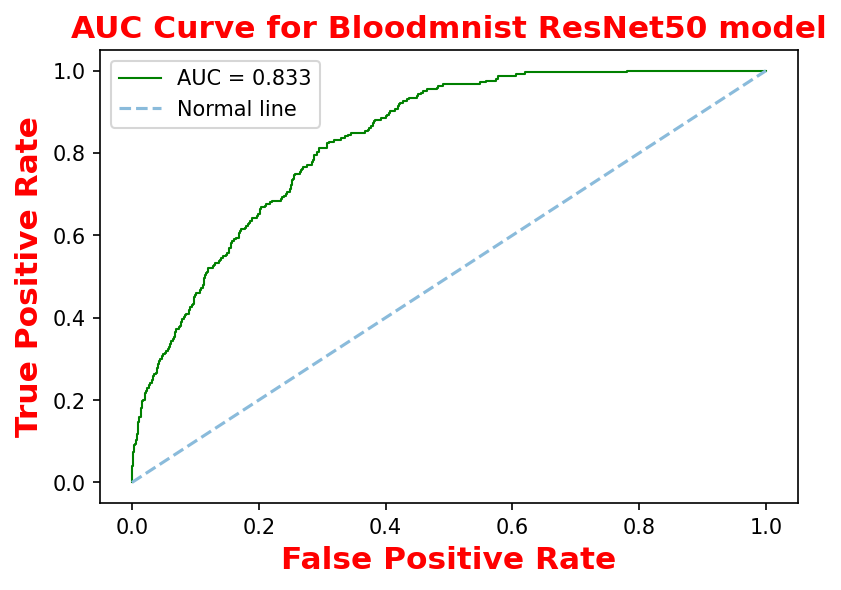

In [ ]:
# Get false and true positive rates
probas1 = resnet_bld_model.predict(bld_X_test_res)
fpr, tpr, thresholds = roc_curve(y_true_bld_res, probas1[:,0], pos_label=0)

# Get area under the curve
roc_auc = auc(fpr, tpr)
x_points = np.arange(0,1.1,0.1)
y_points = np.arange(0,1.1,0.1)

# Plot ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.plot(x_points, y_points, linestyle = 'dashed',label=f'Normal line')
plt.title('AUC Curve for Bloodmnist ResNet50 model',color='red',fontweight='bold',fontsize=15)
plt.xlabel('False Positive Rate',color='red',fontweight='bold',fontsize=15)
plt.ylabel('True Positive Rate',color='red',fontweight='bold',fontsize=15)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.savefig("AUC_bld.jpg")
plt.legend()
plt.show()


##Bloodmnist MobileNetV2

In [ ]:

# generate classification report
target_names = [
    'basophil', 'eosinophil', 'erythroblast', 'granulocytes',
    'lymphocyte', 'monocyte', 'neutrophil', 'platelet'
]



y_pred_mob = model_mob.predict(bld_X_test_mob)
y_pred_classes_mob = [np.argmax(element) for element in y_pred_mob]
y_test_int_mob = np.argmax(bld_y_test_mob, axis=1)
y_pred_int_mob = np.argmax(y_pred_mob, axis=1)

# Print classification report
print("Classification Report: \n", classification_report(y_test_int_mob, y_pred_int_mob))



###Prediction of Model

### Confusion Matrix

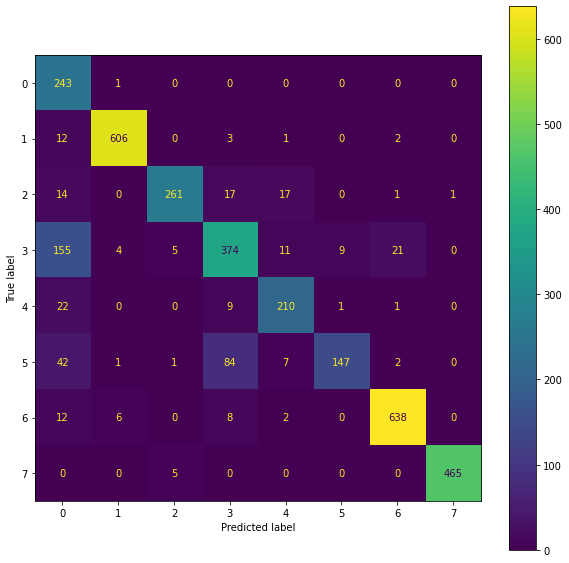

In [ ]:
cm = confusion_matrix(y_test_int_mob, y_pred_int_mob)
cm_display = ConfusionMatrixDisplay(cm,display_labels=unique_labels_bld)
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)

In [ ]:
print('Confusion Matrix:\n', cm)

###AUC of Model

107/107 [==============================] - 1s 7ms/step


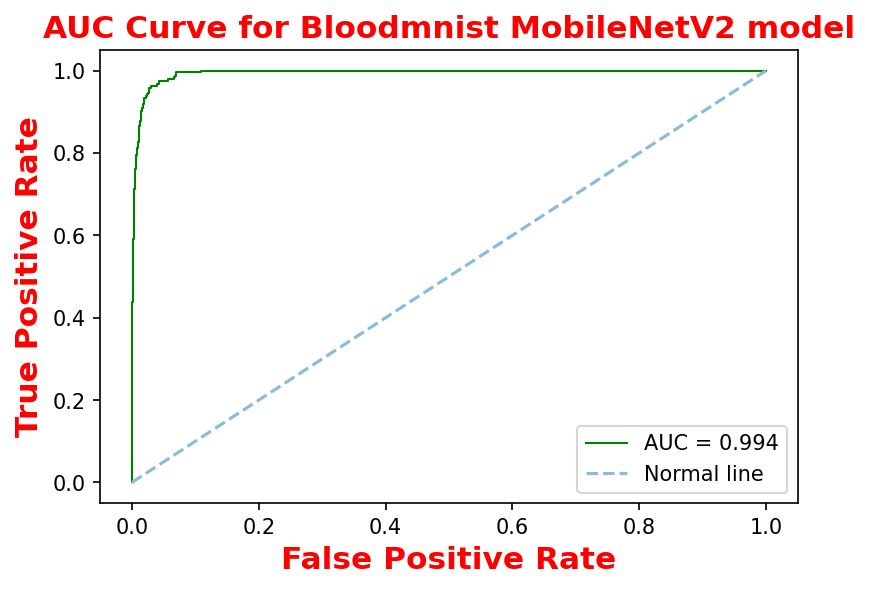

107/107 [==============================] - 1s 7ms/step


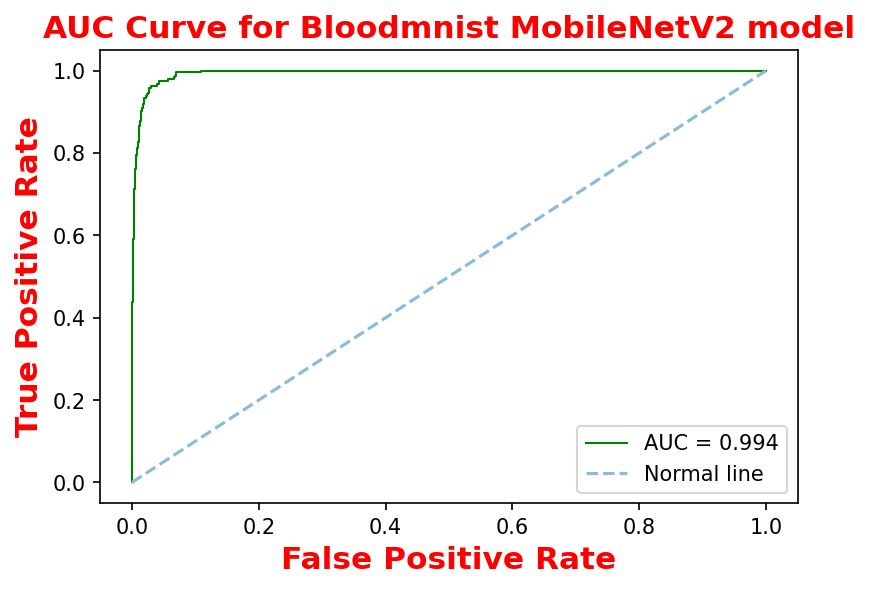

In [ ]:
# Get false and true positive
bld_y_test_mob = np.argmax(bld_y_test_mob, axis=1)
probas1=model_mob.predict(bld_X_test_mob)
fpr, tpr, thresholds = roc_curve(bld_y_test_mob, probas1[:,0], pos_label=0)

# Get area under the curve
roc_auc = auc(fpr, tpr)
x_points=np.arange(0,1.1,0.1)
y_points=np.arange(0,1.1,0.1)

# Plot ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.plot(x_points, y_points, linestyle = 'dashed',label=f'Normal line')
plt.title('AUC Curve for Bloodmnist MobileNetV2 model',color='red',fontweight='bold',fontsize=15)
plt.xlabel('False Positive Rate',color='red',fontweight='bold',fontsize=15)
plt.ylabel('True Positive Rate',color='red',fontweight='bold',fontsize=15)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.savefig("AUC_bld.jpg")
plt.legend()
plt.show()